In [29]:
import os
# no nvlink
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
# use a specific GPU
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5,6,7"

In [3]:
import json

with open('/data/students/juan/train/grocery-item-segmentation-yolo/dataset/annotations/instances_train.json') as file:
    annotations = json.load(file)

print(annotations.keys())
print(annotations['categories'])
category_names = sorted([{'id': ac['id'], 'name': ac['name']} for ac in annotations['categories']], key=lambda x: x['id'])
print(category_names)
print(len(category_names))
print([ac['name'] for ac in category_names])

dict_keys(['images', 'categories', 'annotations'])
[{'id': 16, 'name': 'pineapple juice', 'supercategory': '', 'color': '#d6504a', 'metadata': {}, 'keypoint_colors': []}, {'supercategory': 'category_id', 'id': 18, 'name': '18'}, {'supercategory': 'type', 'id': 24, 'name': 'GreenCross Ethyl Alcohol'}, {'id': 19, 'name': 'pink_shampoo', 'supercategory': '', 'color': '#35e071', 'metadata': {}, 'keypoint_colors': []}, {'supercategory': 'type', 'id': 22, 'name': 'toothpaste'}, {'id': 8, 'name': 'garlic', 'supercategory': '', 'color': '#b059f0', 'metadata': {}, 'keypoint_colors': []}, {'id': 14, 'name': 'peanut_butter', 'supercategory': '', 'color': '#dccd1c', 'metadata': {}, 'keypoint_colors': []}, {'id': 6, 'name': 'Cooking_oil', 'supercategory': '', 'color': '#10d39c', 'metadata': {}, 'creator': 'jeryl4913', 'keypoint_colors': []}, {'id': 20, 'name': '20', 'supercategory': '', 'color': '#613fe3', 'metadata': {}, 'keypoint_colors': []}, {'supercategory': 'type', 'id': 1, 'name': 'bottled_s

Current running training script with YOLO8-nano.

`yolo task=segment mode=train model=yolov8n-seg.pt data=config.yaml epochs=1 imgsz=640`

Current running validation script with YOLO8-nano.

`yolo task=segment mode=val model=yolov8n-seg.pt data=config.yaml epochs=1 imgsz=640`

Current running inference script with YOLO8-nano.

`yolo task=segment mode=predict model=yolov8n-seg.pt source=/data/detection/grocery/dataset/images/val`

References:

* https://docs.ultralytics.com/datasets/segment/#port-or-convert-label-formats
* https://github.com/ultralytics/JSON2YOLO/blob/main/general_json2yolo.py
* https://stackoverflow.com/questions/76651217/how-to-use-one-json-label-file-for-all-the-training-images-for-yolo-nas 
* https://github.com/ultralytics/ultralytics/issues/11268
* Train hyperparameters: https://docs.ultralytics.com/modes/train/#train-settings 


# Trial 1

YOLO-V8 with 10 epochs, default settings.

In [45]:
!yolo task=segment mode=train model=yolov8n-seg.pt data=config.yaml epochs=10 imgsz=640 batch=640 device=0,1,2,3,4,5,6,7

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:1 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:3 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:4 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:5 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:6 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:7 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=config.yaml, epochs=10, time=None, patience=100, batch=640, img

In [46]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,262,744 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        845       1862       0.91        0.8      0.879      0.779        0.9       0.79      0.858      0.736
          Bottled Soda         37         37      0.892       0.89      0.911      0.818       0.89      0.879      0.911      0.822
                Cheese         40         58       0.86      0.741      0.832      0.707      0.867      0.741      0.832      0.692
                Kitkat         42         47          1      0.767      0.928      0.823      0.972      0.745      0.902      0.792
                Coffee         30         66      0.867      0.894       0.93      0.778      0.853      0.878      0.902  

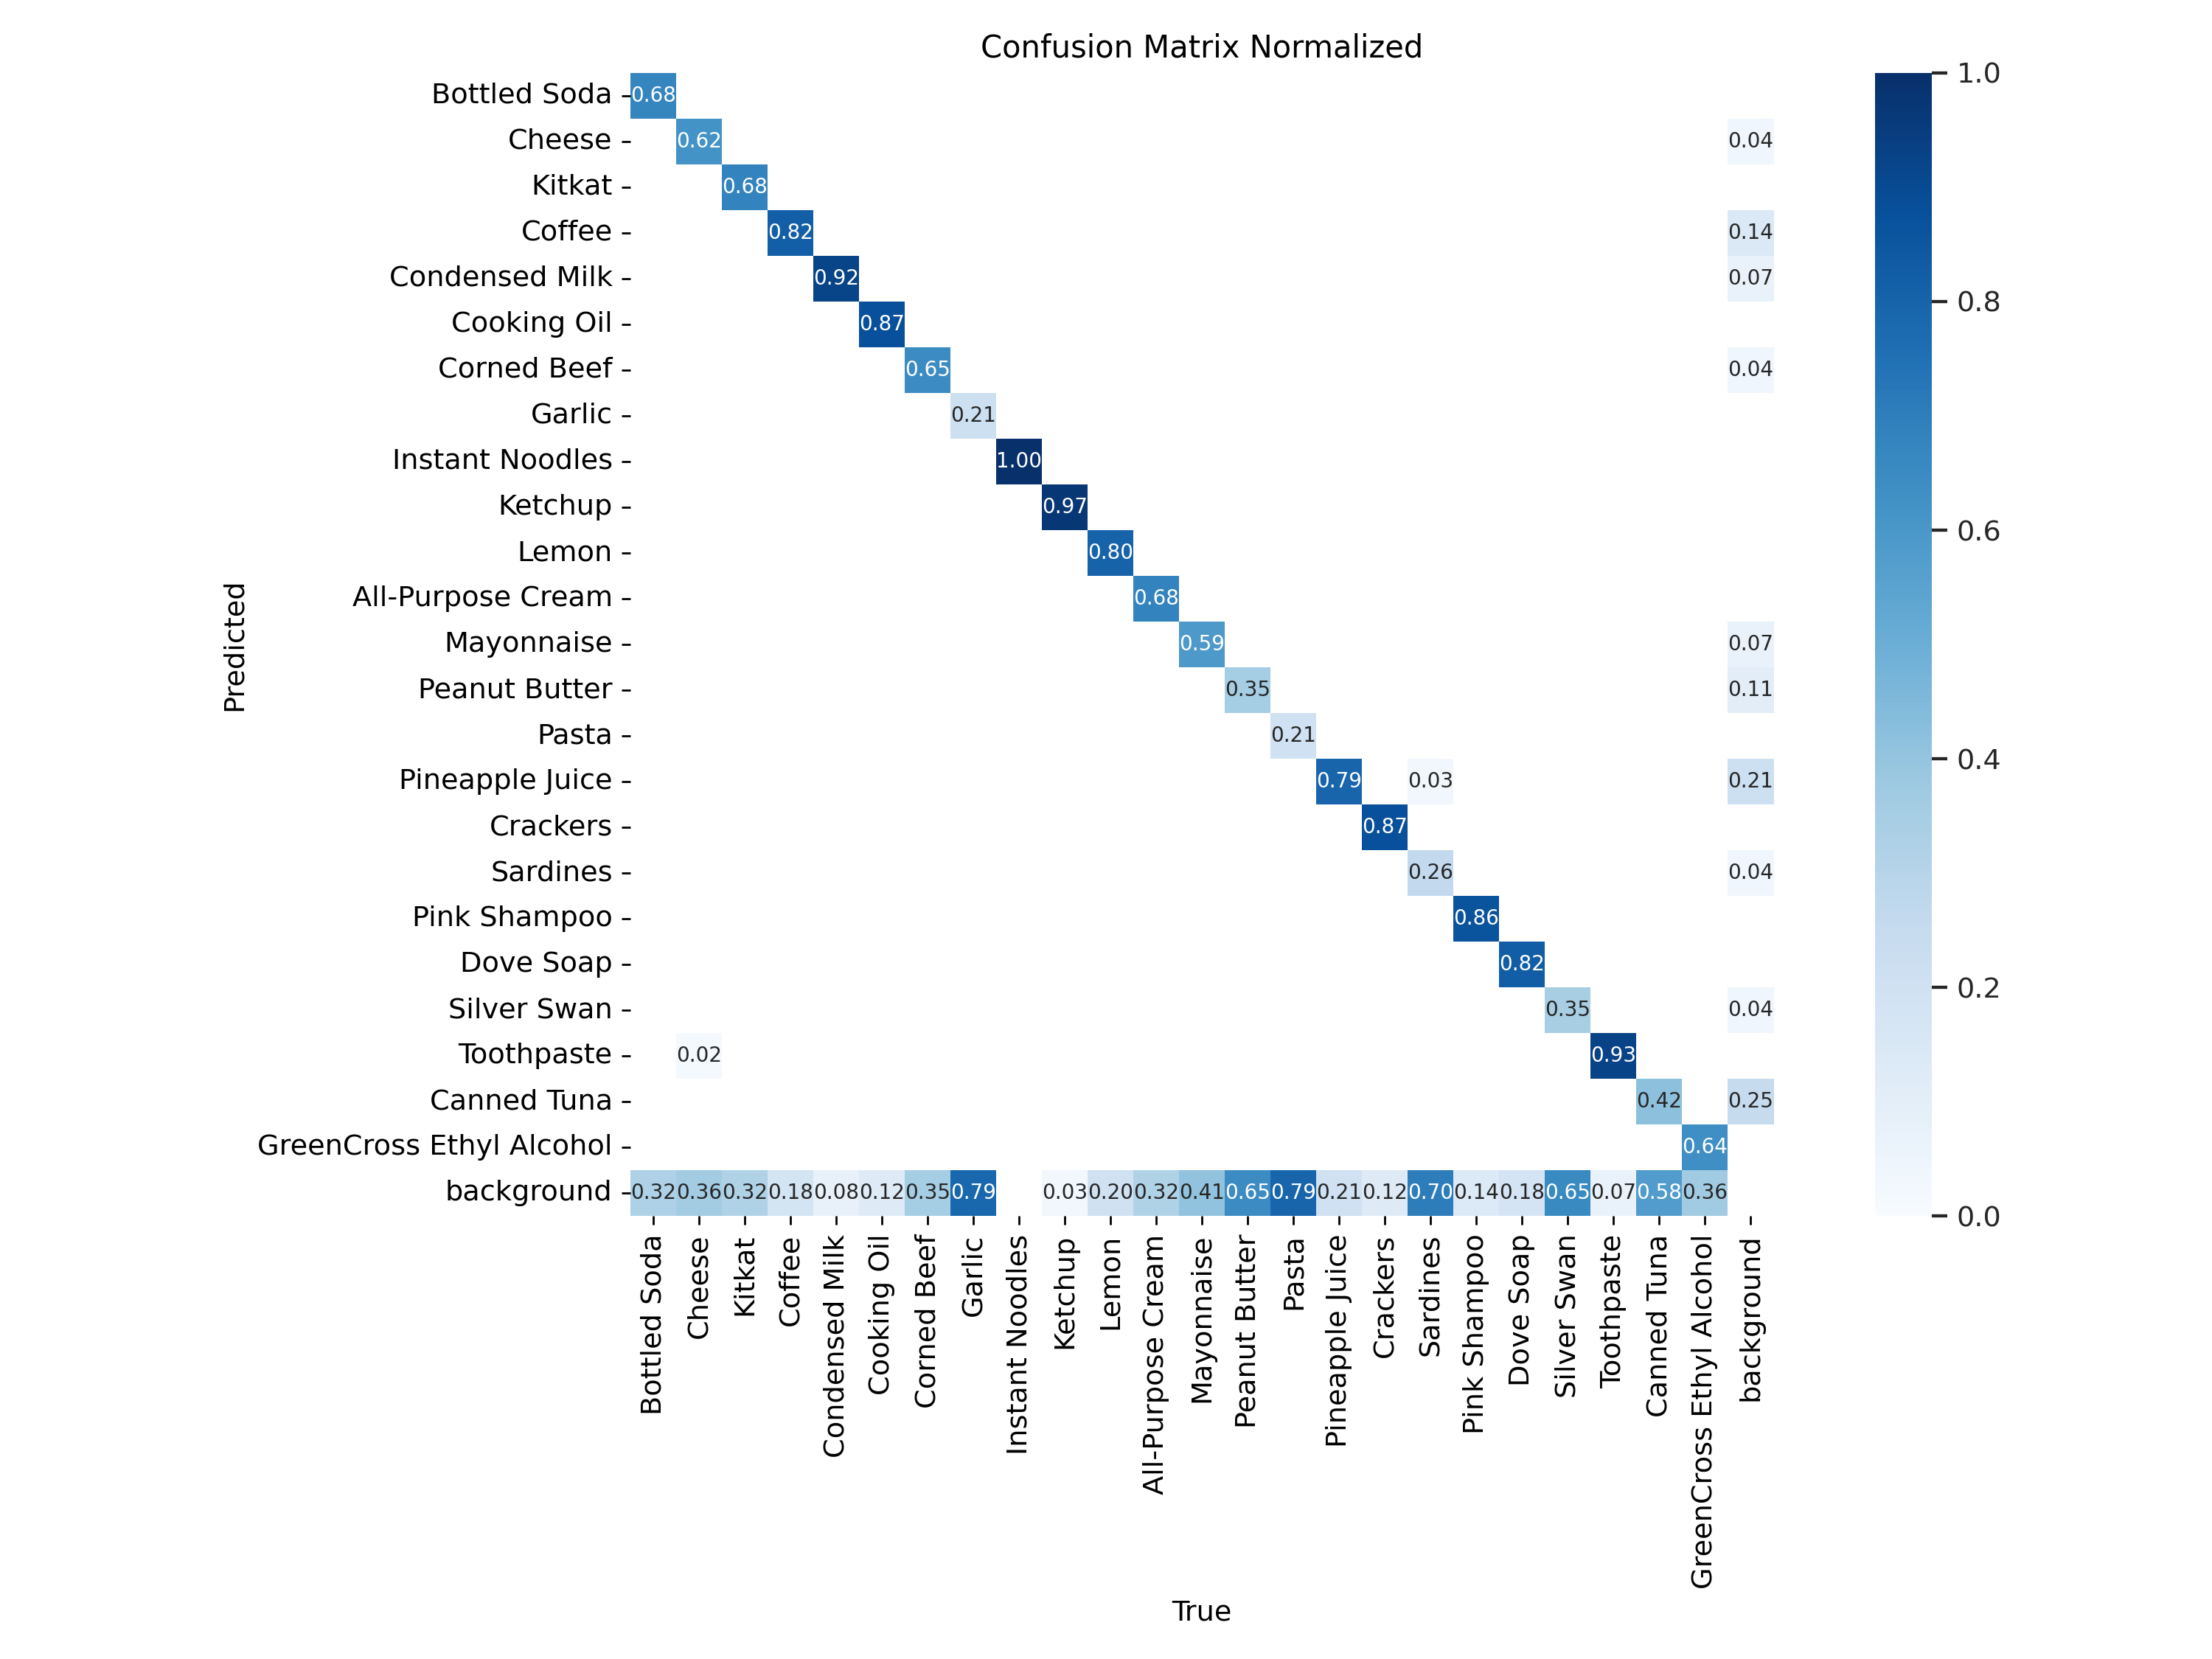

In [47]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

## Inference test on Trial 1

In [48]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt source=/data/detection/grocery/dataset/images/val

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,262,744 parameters, 0 gradients, 12.0 GFLOPs

image 1/775 /data/detection/grocery/dataset/images/val/010012.jpg: 640x480 1 Bottled Soda, 40.5ms
image 2/775 /data/detection/grocery/dataset/images/val/010017.jpg: 640x480 1 Bottled Soda, 6.6ms
image 3/775 /data/detection/grocery/dataset/images/val/010033.jpg: 640x480 1 Bottled Soda, 6.0ms
image 4/775 /data/detection/grocery/dataset/images/val/010036.jpg: 640x480 1 Bottled Soda, 6.0ms
image 5/775 /data/detection/grocery/dataset/images/val/010039.jpg: 640x480 1 Bottled Soda, 6.0ms
image 6/775 /data/detection/grocery/dataset/images/val/010065.jpg: 640x480 1 Bottled Soda, 6.5ms
image 7/775 /data/detection/grocery/dataset/images/val/010079.jpg: 640x480 1 Bottled Soda, 6.5ms
image 8/775 /data/detection/grocery/dataset/images/val/010082.jpg: 640x480 1 Bottled Soda, 6.5ms
image 9/775 /data/detection/grocery/dat

# Trial 2

Use YOLO v11 Nano.

In [50]:
!yolo task=segment mode=train model=yolo11n-seg.pt data=config.yaml epochs=10 imgsz=640 batch=320 device=0,1,2,3,4,5,6,7

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:1 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:3 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:4 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:5 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:6 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:7 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=config.yaml, epochs=10, time=None, patience=100, batch=320, img

In [51]:
!yolo task=segment mode=val model=runs/segment/train2/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        845       1862      0.946      0.901      0.922       0.83      0.938      0.894      0.904      0.783
          Bottled Soda         37         37      0.939      0.973      0.961      0.888      0.939      0.973      0.961      0.854
                Cheese         40         58      0.981      0.885      0.944      0.849      0.981      0.884      0.944      0.822
                Kitkat         42         47          1      0.792      0.908      0.783      0.973       0.77       0.87       0.77
                Coffee         30         66      0.913      0.848      0.907      0.803      0.913      0.848      0.904  

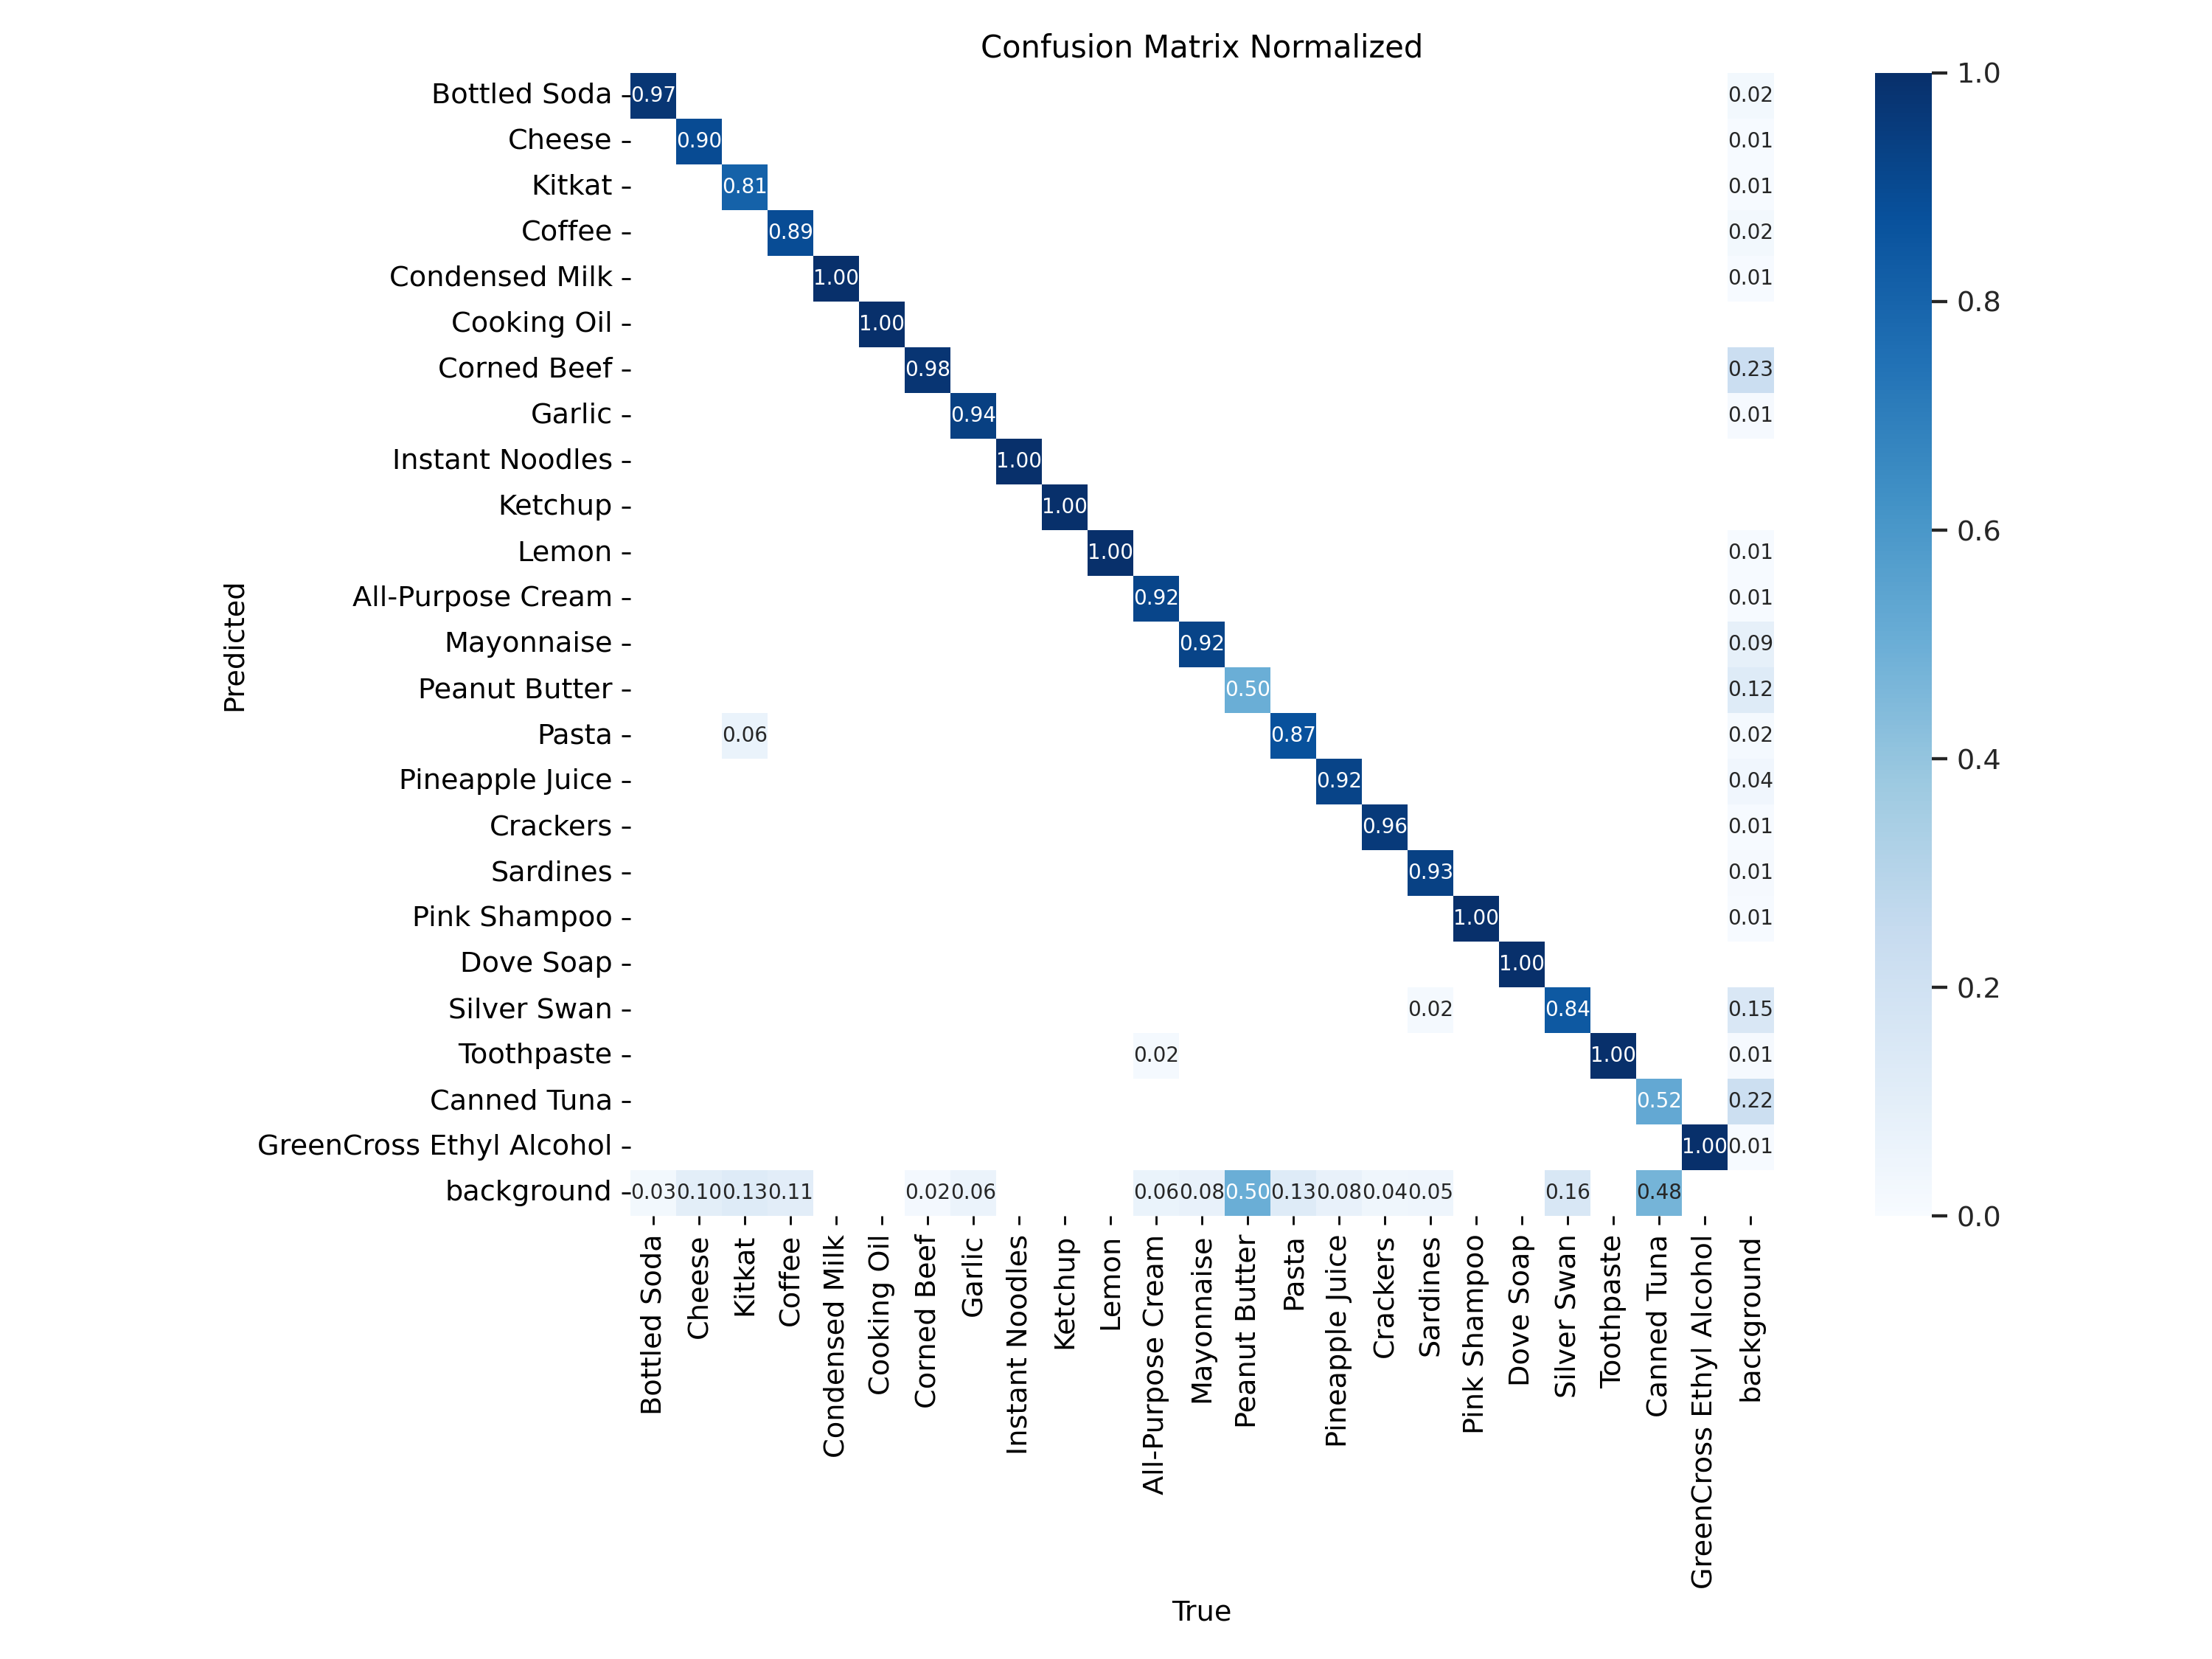

In [52]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val2/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

It seems that despite using an upgraded model, there is only a marginal improvement in the model's performance on the most difficult classes to classify.

## Inference test on Trial 2

In [53]:
!yolo task=segment mode=predict model=runs/segment/train2/weights/best.pt source=/data/detection/grocery/dataset/images/val

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11n-seg summary (fused): 265 layers, 2,839,248 parameters, 0 gradients, 10.2 GFLOPs

image 1/775 /data/detection/grocery/dataset/images/val/010012.jpg: 640x480 1 Bottled Soda, 48.0ms
image 2/775 /data/detection/grocery/dataset/images/val/010017.jpg: 640x480 1 Bottled Soda, 8.9ms
image 3/775 /data/detection/grocery/dataset/images/val/010033.jpg: 640x480 1 Bottled Soda, 8.0ms
image 4/775 /data/detection/grocery/dataset/images/val/010036.jpg: 640x480 1 Bottled Soda, 7.9ms
image 5/775 /data/detection/grocery/dataset/images/val/010039.jpg: 640x480 1 Bottled Soda, 8.0ms
image 6/775 /data/detection/grocery/dataset/images/val/010065.jpg: 640x480 1 Bottled Soda, 8.4ms
image 7/775 /data/detection/grocery/dataset/images/val/010079.jpg: 640x480 1 Bottled Soda, 8.4ms
image 8/775 /data/detection/grocery/dataset/images/val/010082.jpg: 640x480 1 Bottled Soda, 8.4ms
image 9/775 /data/detection/grocery/dat

# Trial 3

Adding some simple augmentation.


In [56]:
!yolo task=segment mode=train model=yolov8n-seg.pt data=config.yaml epochs=10 imgsz=640 mosaic=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=0.373 translate=0.45 scale=0.5 shear=0.3 flipud=0.01 fliplr=0.5 batch=320 device=0,1,2,3,4,5,6,7

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:1 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:3 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:4 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:5 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:6 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:7 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=config.yaml, epochs=10, time=None, patience=100, batch=320, img

In [57]:
!yolo task=segment mode=val model=runs/segment/train3/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,262,744 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        845       1862      0.939      0.885      0.923       0.82       0.93      0.873      0.902      0.774
          Bottled Soda         37         37       0.97      0.875       0.95      0.827       0.97      0.869      0.951      0.823
                Cheese         40         58          1      0.812      0.943      0.822          1      0.807      0.942      0.816
                Kitkat         42         47      0.999      0.872      0.955      0.861      0.975      0.828      0.916      0.783
                Coffee         30         66      0.926      0.942      0.953      0.835      0.925       0.93      0.949  

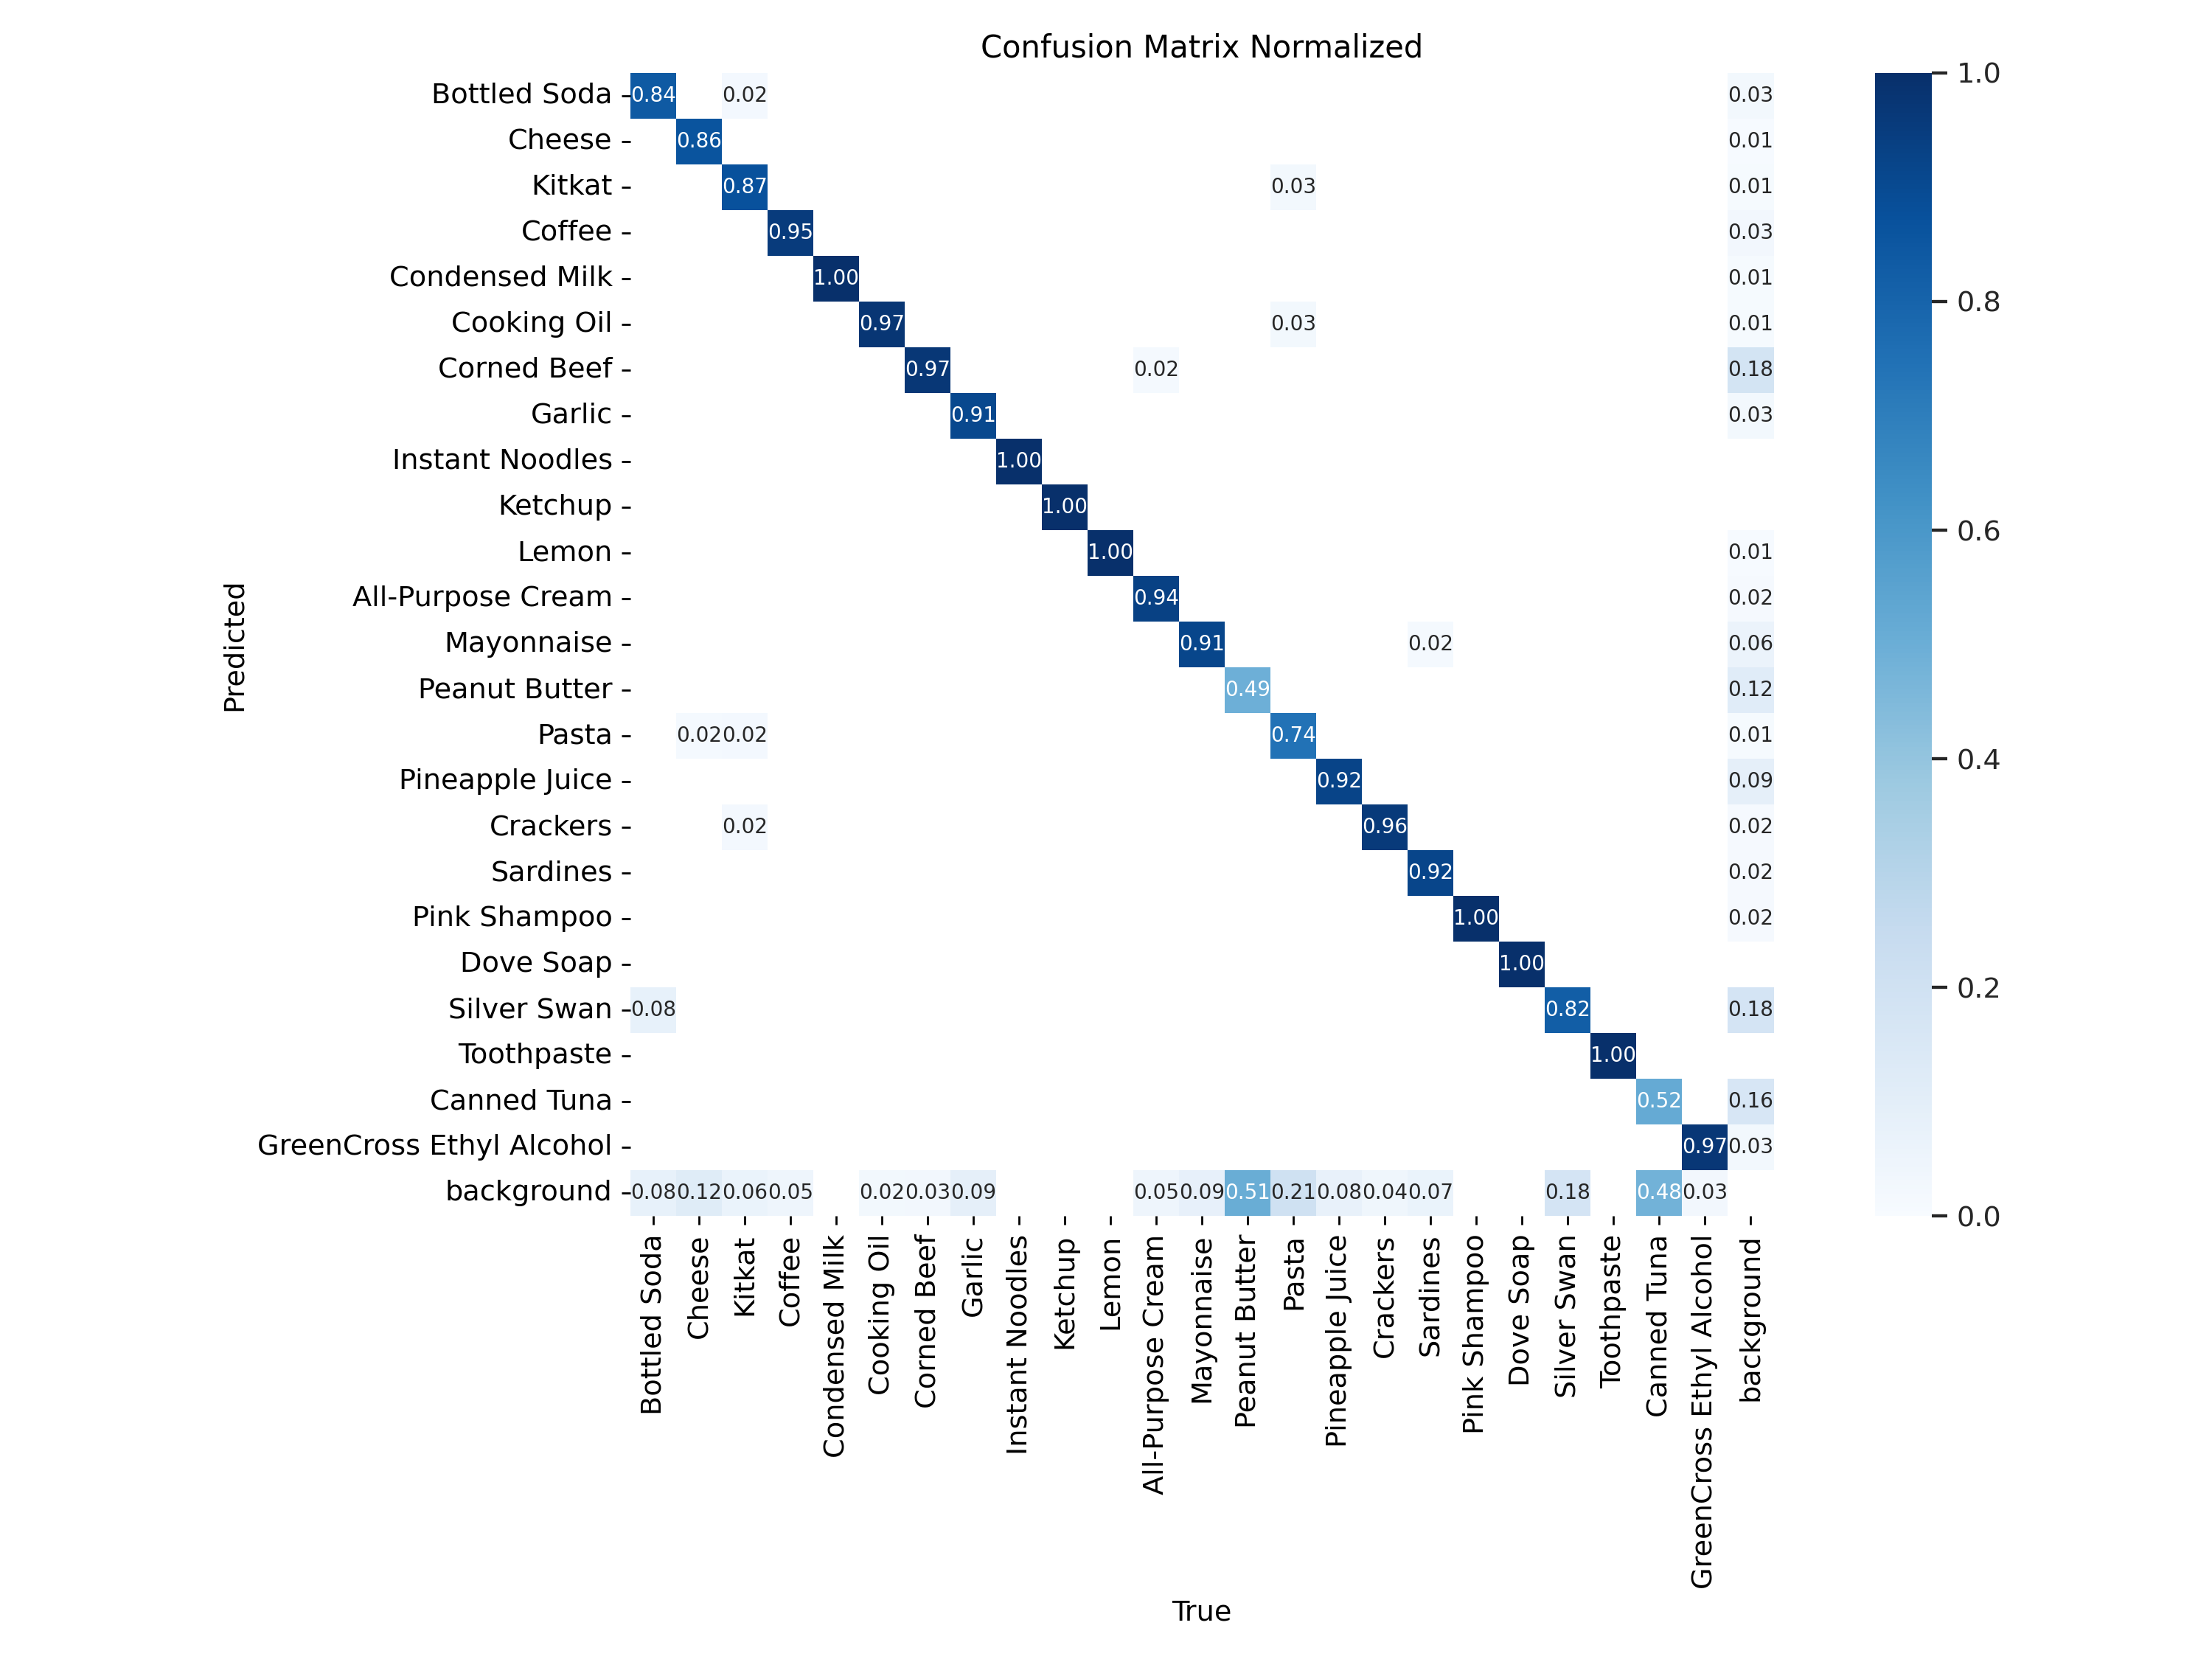

In [58]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val3/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

## Inference test on Trial 3

In [59]:
!yolo task=segment mode=predict model=runs/segment/train3/weights/best.pt source=/data/detection/grocery/dataset/images/val

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,262,744 parameters, 0 gradients, 12.0 GFLOPs

image 1/775 /data/detection/grocery/dataset/images/val/010012.jpg: 640x480 1 Bottled Soda, 1 Sardines, 42.6ms
image 2/775 /data/detection/grocery/dataset/images/val/010017.jpg: 640x480 1 Bottled Soda, 6.5ms
image 3/775 /data/detection/grocery/dataset/images/val/010033.jpg: 640x480 1 Bottled Soda, 6.0ms
image 4/775 /data/detection/grocery/dataset/images/val/010036.jpg: 640x480 1 Bottled Soda, 6.0ms
image 5/775 /data/detection/grocery/dataset/images/val/010039.jpg: 640x480 1 Bottled Soda, 6.0ms
image 6/775 /data/detection/grocery/dataset/images/val/010065.jpg: 640x480 1 Bottled Soda, 6.4ms
image 7/775 /data/detection/grocery/dataset/images/val/010079.jpg: 640x480 1 Bottled Soda, 6.5ms
image 8/775 /data/detection/grocery/dataset/images/val/010082.jpg: 640x480 1 Bottled Soda, 6.5ms
image 9/775 /data/detection

# Trial 4: Corrections: Using a model with more params

In [60]:
!yolo task=segment mode=train model=yolov8m-seg.pt data=config.yaml epochs=10 imgsz=640 mosaic=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=0.373 translate=0.45 scale=0.5 shear=0.3 flipud=0.01 fliplr=0.5 batch=320 device=0,1,2,3,4,5,6,7

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:1 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:3 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:4 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:5 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:6 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:7 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=config.yaml, epochs=10, time=None, patience=100, batch=320, img

In [61]:
!yolo task=segment mode=val model=runs/segment/train4/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,236,280 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        845       1862      0.947      0.921      0.941      0.875       0.94      0.916      0.926      0.833
          Bottled Soda         37         37      0.982      0.973      0.994      0.951      0.981      0.973      0.994      0.924
                Cheese         40         58      0.982       0.95      0.986      0.916      0.982      0.951      0.986      0.893
                Kitkat         42         47      0.978      0.939      0.971      0.913      0.978      0.941      0.967      0.873
                Coffee         30         66      0.944      0.955      0.975       0.88      0.942      0.955      0.972

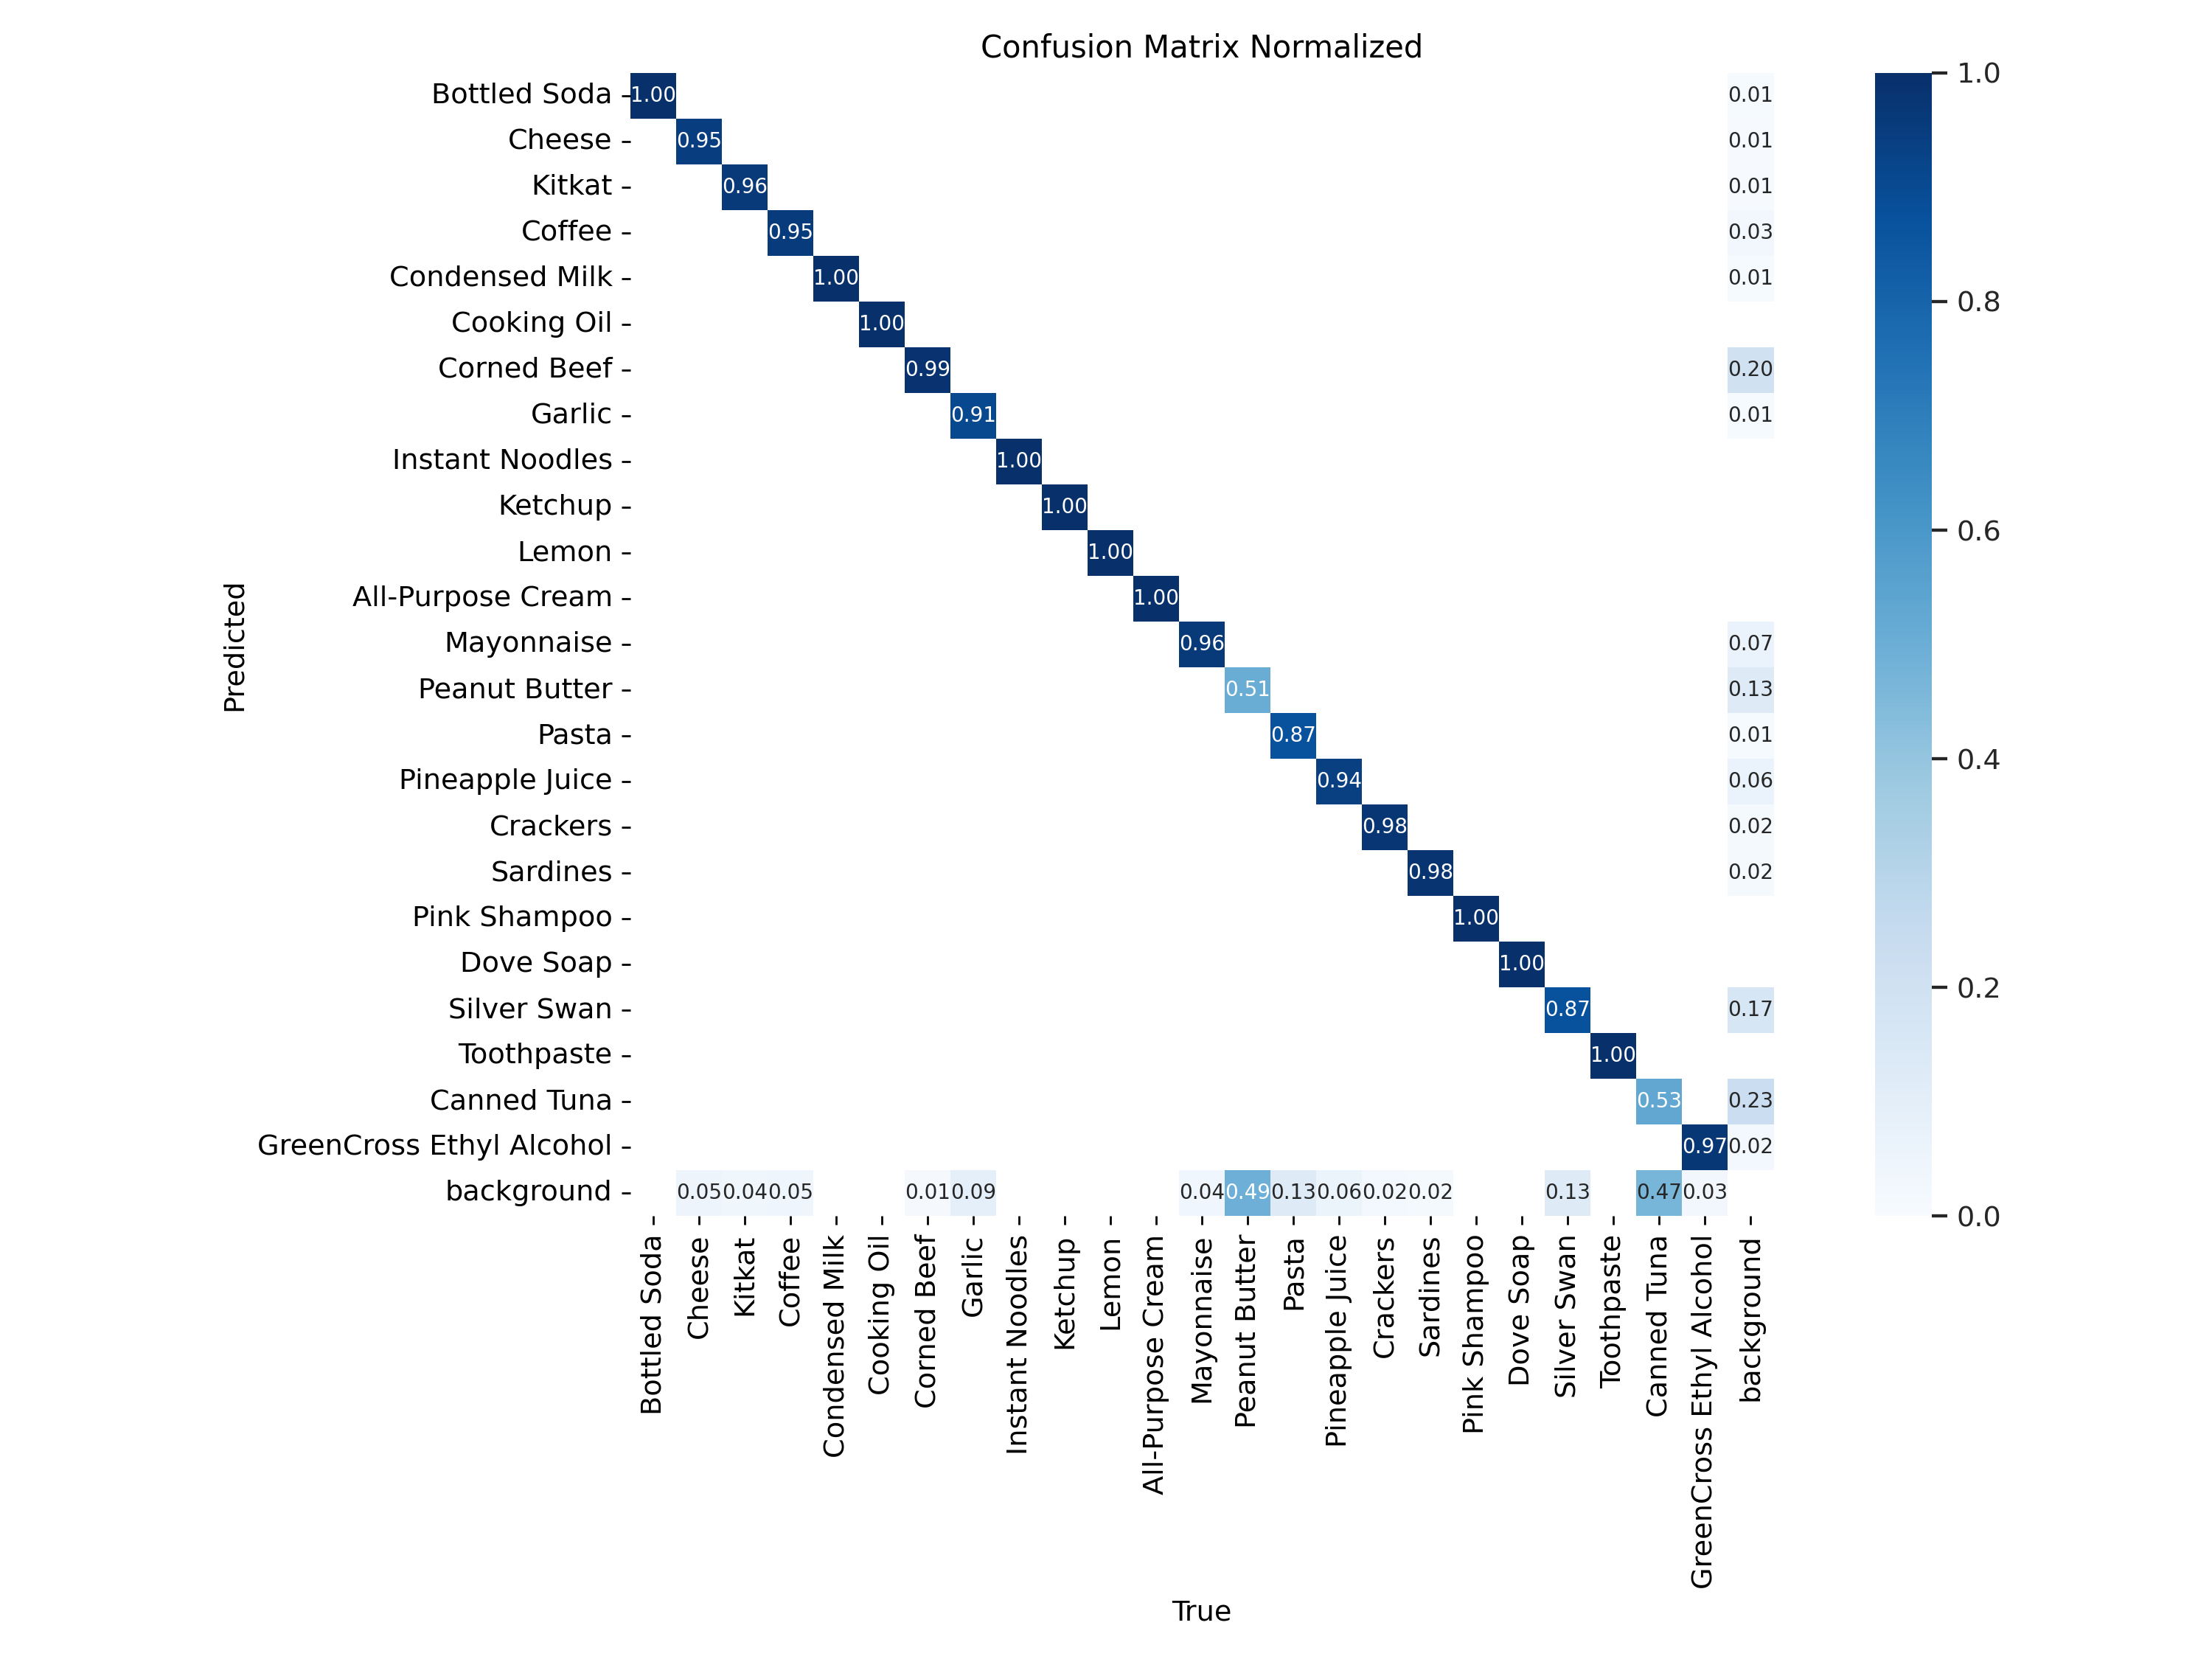

In [62]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val4/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

## Inference test on Trial 4

In [63]:
!yolo task=segment mode=predict model=runs/segment/train4/weights/best.pt source=/data/detection/grocery/dataset/images/val

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,236,280 parameters, 0 gradients, 110.0 GFLOPs

image 1/775 /data/detection/grocery/dataset/images/val/010012.jpg: 640x480 1 Bottled Soda, 47.8ms
image 2/775 /data/detection/grocery/dataset/images/val/010017.jpg: 640x480 1 Bottled Soda, 8.1ms
image 3/775 /data/detection/grocery/dataset/images/val/010033.jpg: 640x480 1 Bottled Soda, 7.7ms
image 4/775 /data/detection/grocery/dataset/images/val/010036.jpg: 640x480 1 Bottled Soda, 7.7ms
image 5/775 /data/detection/grocery/dataset/images/val/010039.jpg: 640x480 1 Bottled Soda, 7.7ms
image 6/775 /data/detection/grocery/dataset/images/val/010065.jpg: 640x480 1 Bottled Soda, 8.0ms
image 7/775 /data/detection/grocery/dataset/images/val/010079.jpg: 640x480 1 Bottled Soda, 8.1ms
image 8/775 /data/detection/grocery/dataset/images/val/010082.jpg: 640x480 1 Bottled Soda, 8.2ms
image 9/775 /data/detection/grocery/d

# Trial 5: Bigger model (YOLO11M-seg)

In [38]:
!yolo task=segment mode=train model=yolo11m-seg.pt data=config.yaml epochs=10 imgsz=640 mosaic=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=0.373 translate=0.45 scale=0.5 shear=0.3 flipud=0.01 fliplr=0.5 batch=320 device=0,1,2,3,4,5,6,7

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:1 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:3 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:4 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:5 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:6 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:7 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=config.yaml, epochs=10, time=None, patience=100, batch=320, img

In [39]:
!yolo task=segment mode=val model=runs/segment/train5/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        845       1862      0.955      0.912       0.94      0.874      0.952      0.909      0.927       0.83
          Bottled Soda         37         37      0.977          1      0.995      0.944      0.977          1      0.995      0.918
                Cheese         40         58      0.981      0.903      0.987      0.902          1       0.92      0.984      0.885
                Kitkat         42         47      0.992      0.936      0.991      0.941       0.97      0.915      0.975      0.894
                Coffee         30         66      0.936      0.894      0.925      0.839      0.952      0.909      0.949

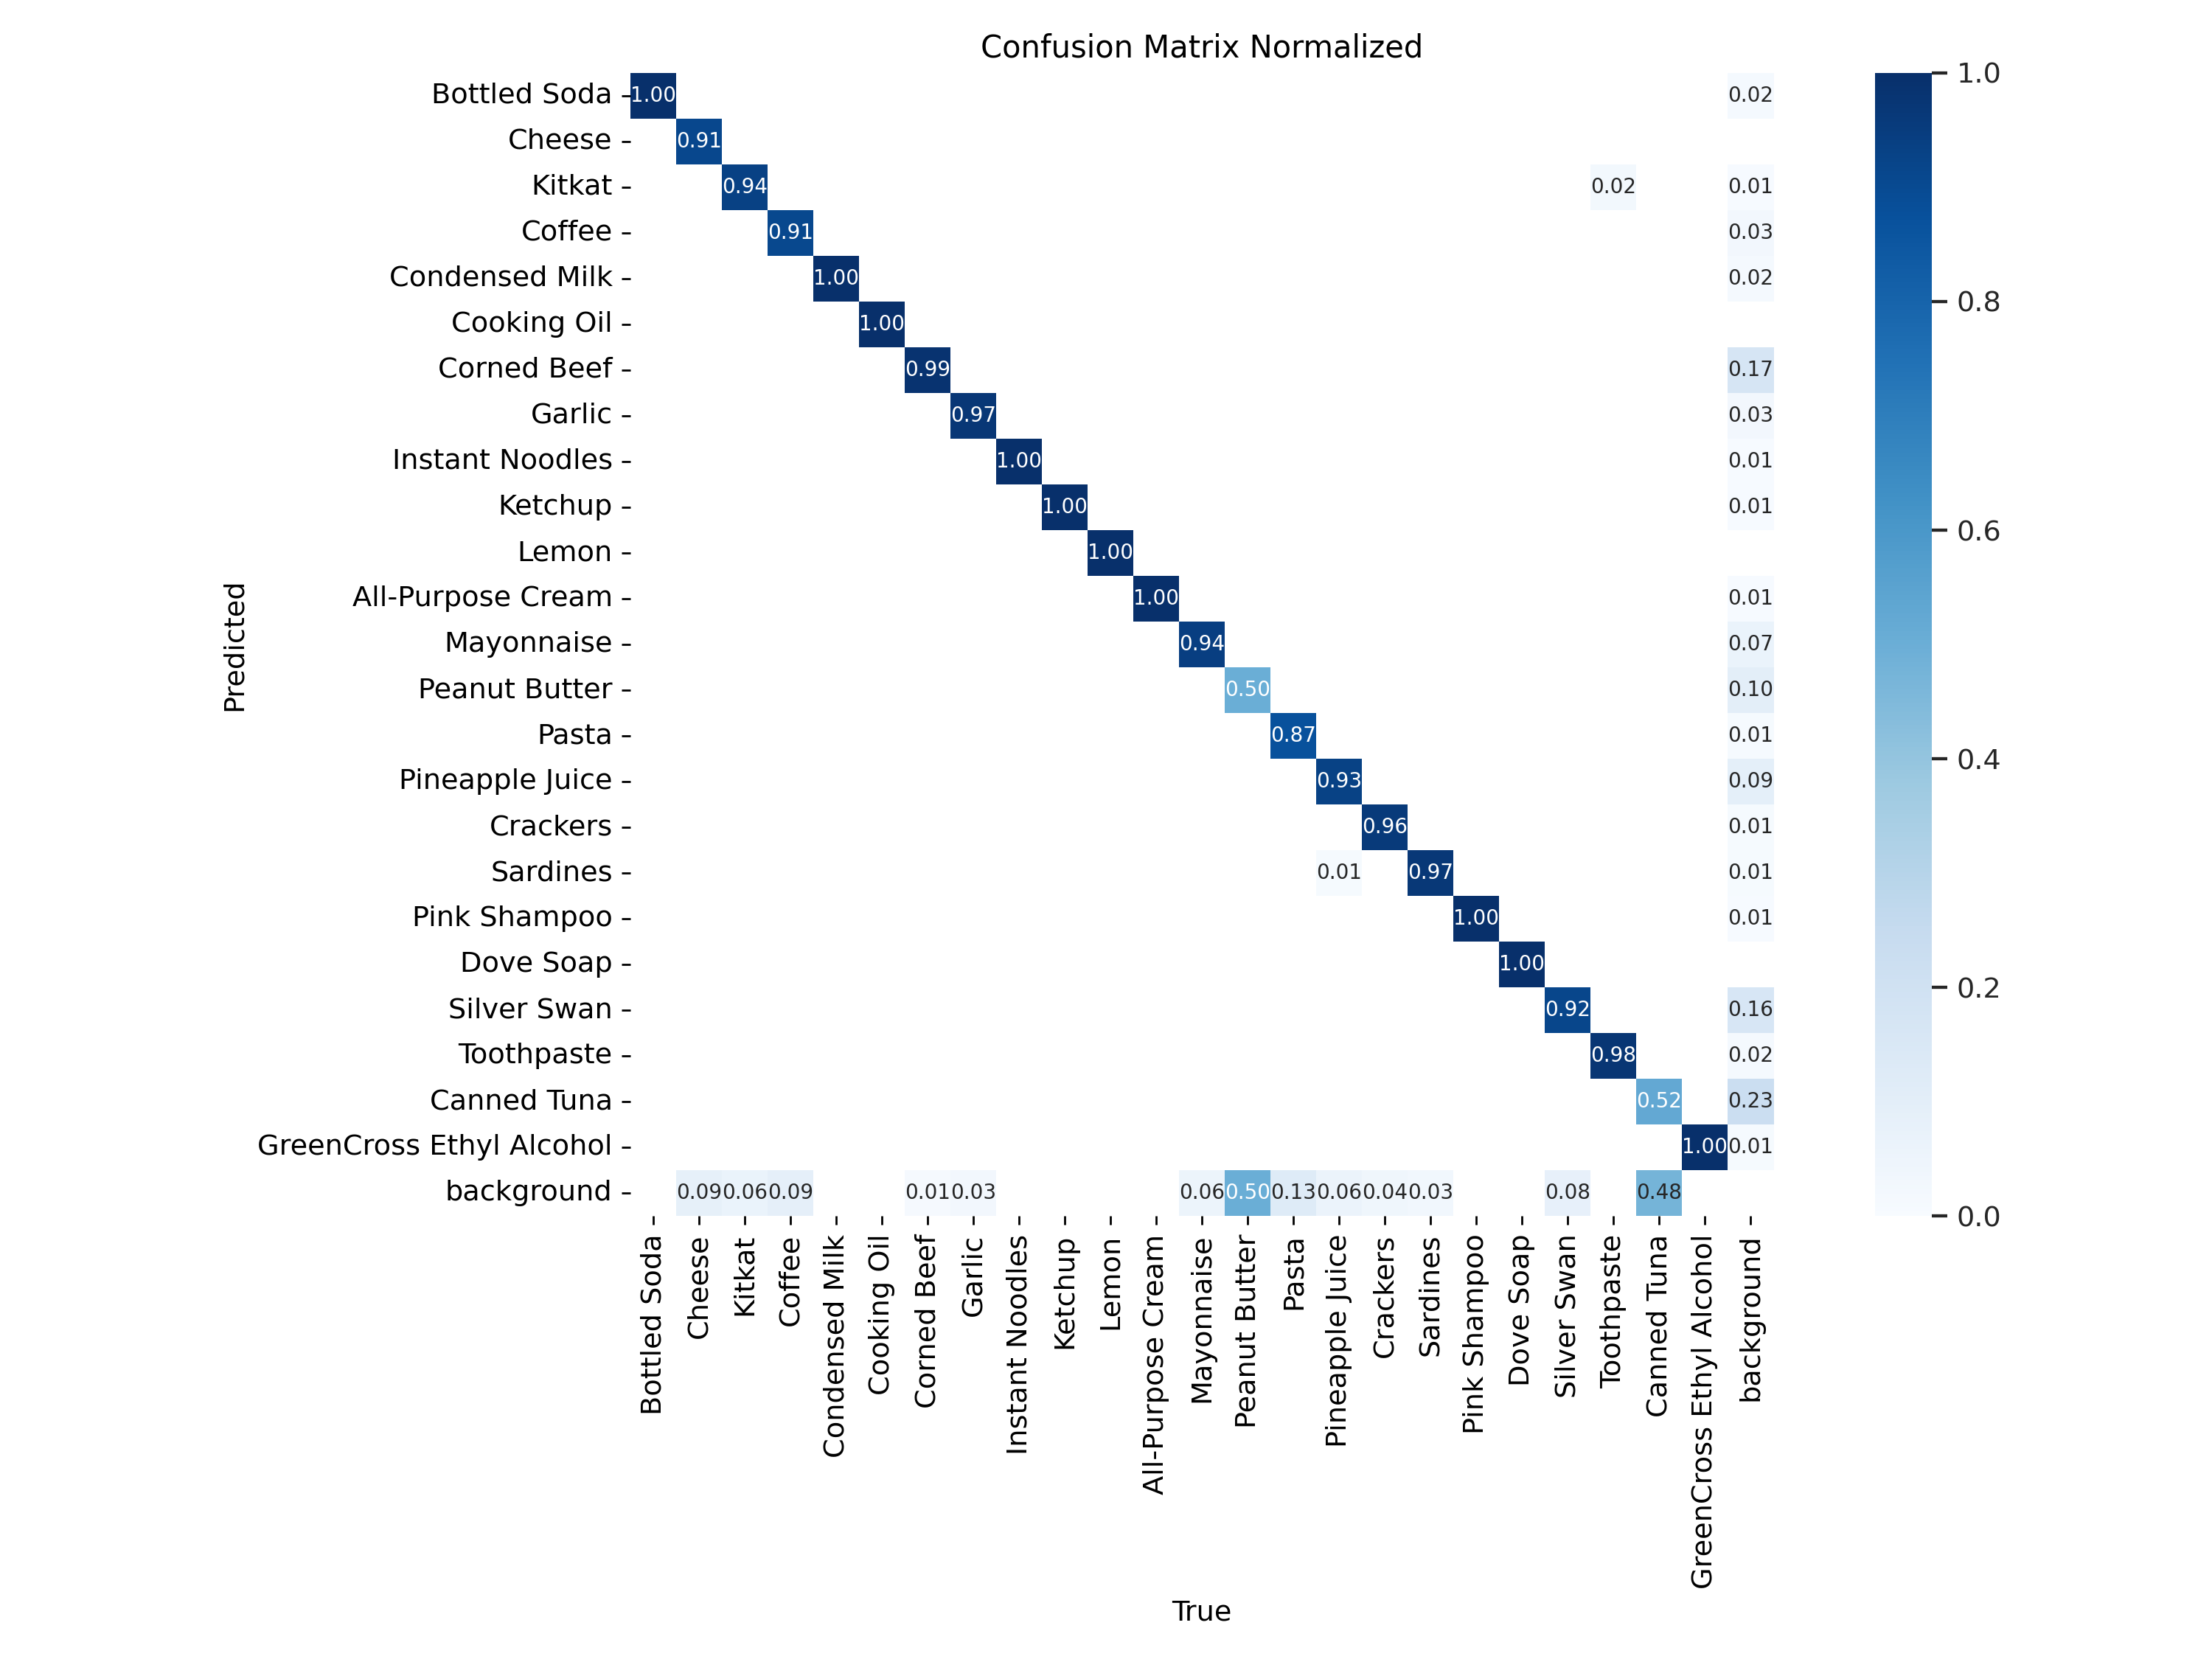

In [40]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val5/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

## Inference test on Trial 5

In [41]:
!yolo task=segment mode=predict model=runs/segment/train5/weights/best.pt source=dataset/images/val

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11m-seg summary (fused): 330 layers, 22,353,816 parameters, 0 gradients, 123.1 GFLOPs

image 1/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010012.jpg: 640x480 1 Bottled Soda, 49.1ms
image 2/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010017.jpg: 640x480 1 Bottled Soda, 10.6ms
image 3/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010033.jpg: 640x480 1 Bottled Soda, 10.0ms
image 4/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010036.jpg: 640x480 1 Bottled Soda, 10.1ms
image 5/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010039.jpg: 640x480 1 Bottled Soda, 10.0ms
image 6/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010065.jpg: 640x480 1 Bottled Soda, 10.5ms
image 7/845 /raid/students/j

# Trial 6: Use largest v11 model (YOLO v11 X for segmentation)

In [2]:
!yolo task=segment mode=train model=yolo11x-seg.pt data=config.yaml epochs=10 imgsz=640 mosaic=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=0.373 translate=0.45 scale=0.5 shear=0.3 flipud=0.01 fliplr=0.5 batch=256 device=0,1,2,3,4,5,6,7

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:1 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:3 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:4 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:5 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:6 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:7 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolo11x-seg.pt, data=config.yaml, epochs=10, time=None, patience=100, batch=256, img

In [7]:
!yolo task=segment mode=val model=runs/segment/train6/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11x-seg summary (fused): 491 layers, 62,029,848 parameters, 0 gradients, 318.7 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        845       1862      0.951      0.919       0.94      0.863      0.944      0.911      0.927      0.821
          Bottled Soda         37         37      0.962      0.973      0.986      0.915      0.963      0.973      0.986      0.888
                Cheese         40         58      0.936      0.966      0.991      0.911      0.938      0.966      0.991      0.902
                Kitkat         42         47          1      0.905      0.967      0.876      0.976      0.882      0.945       0.85
                Coffee         30         66      0.944      0.924      0.943      0.843      0.962      0.939      0.964

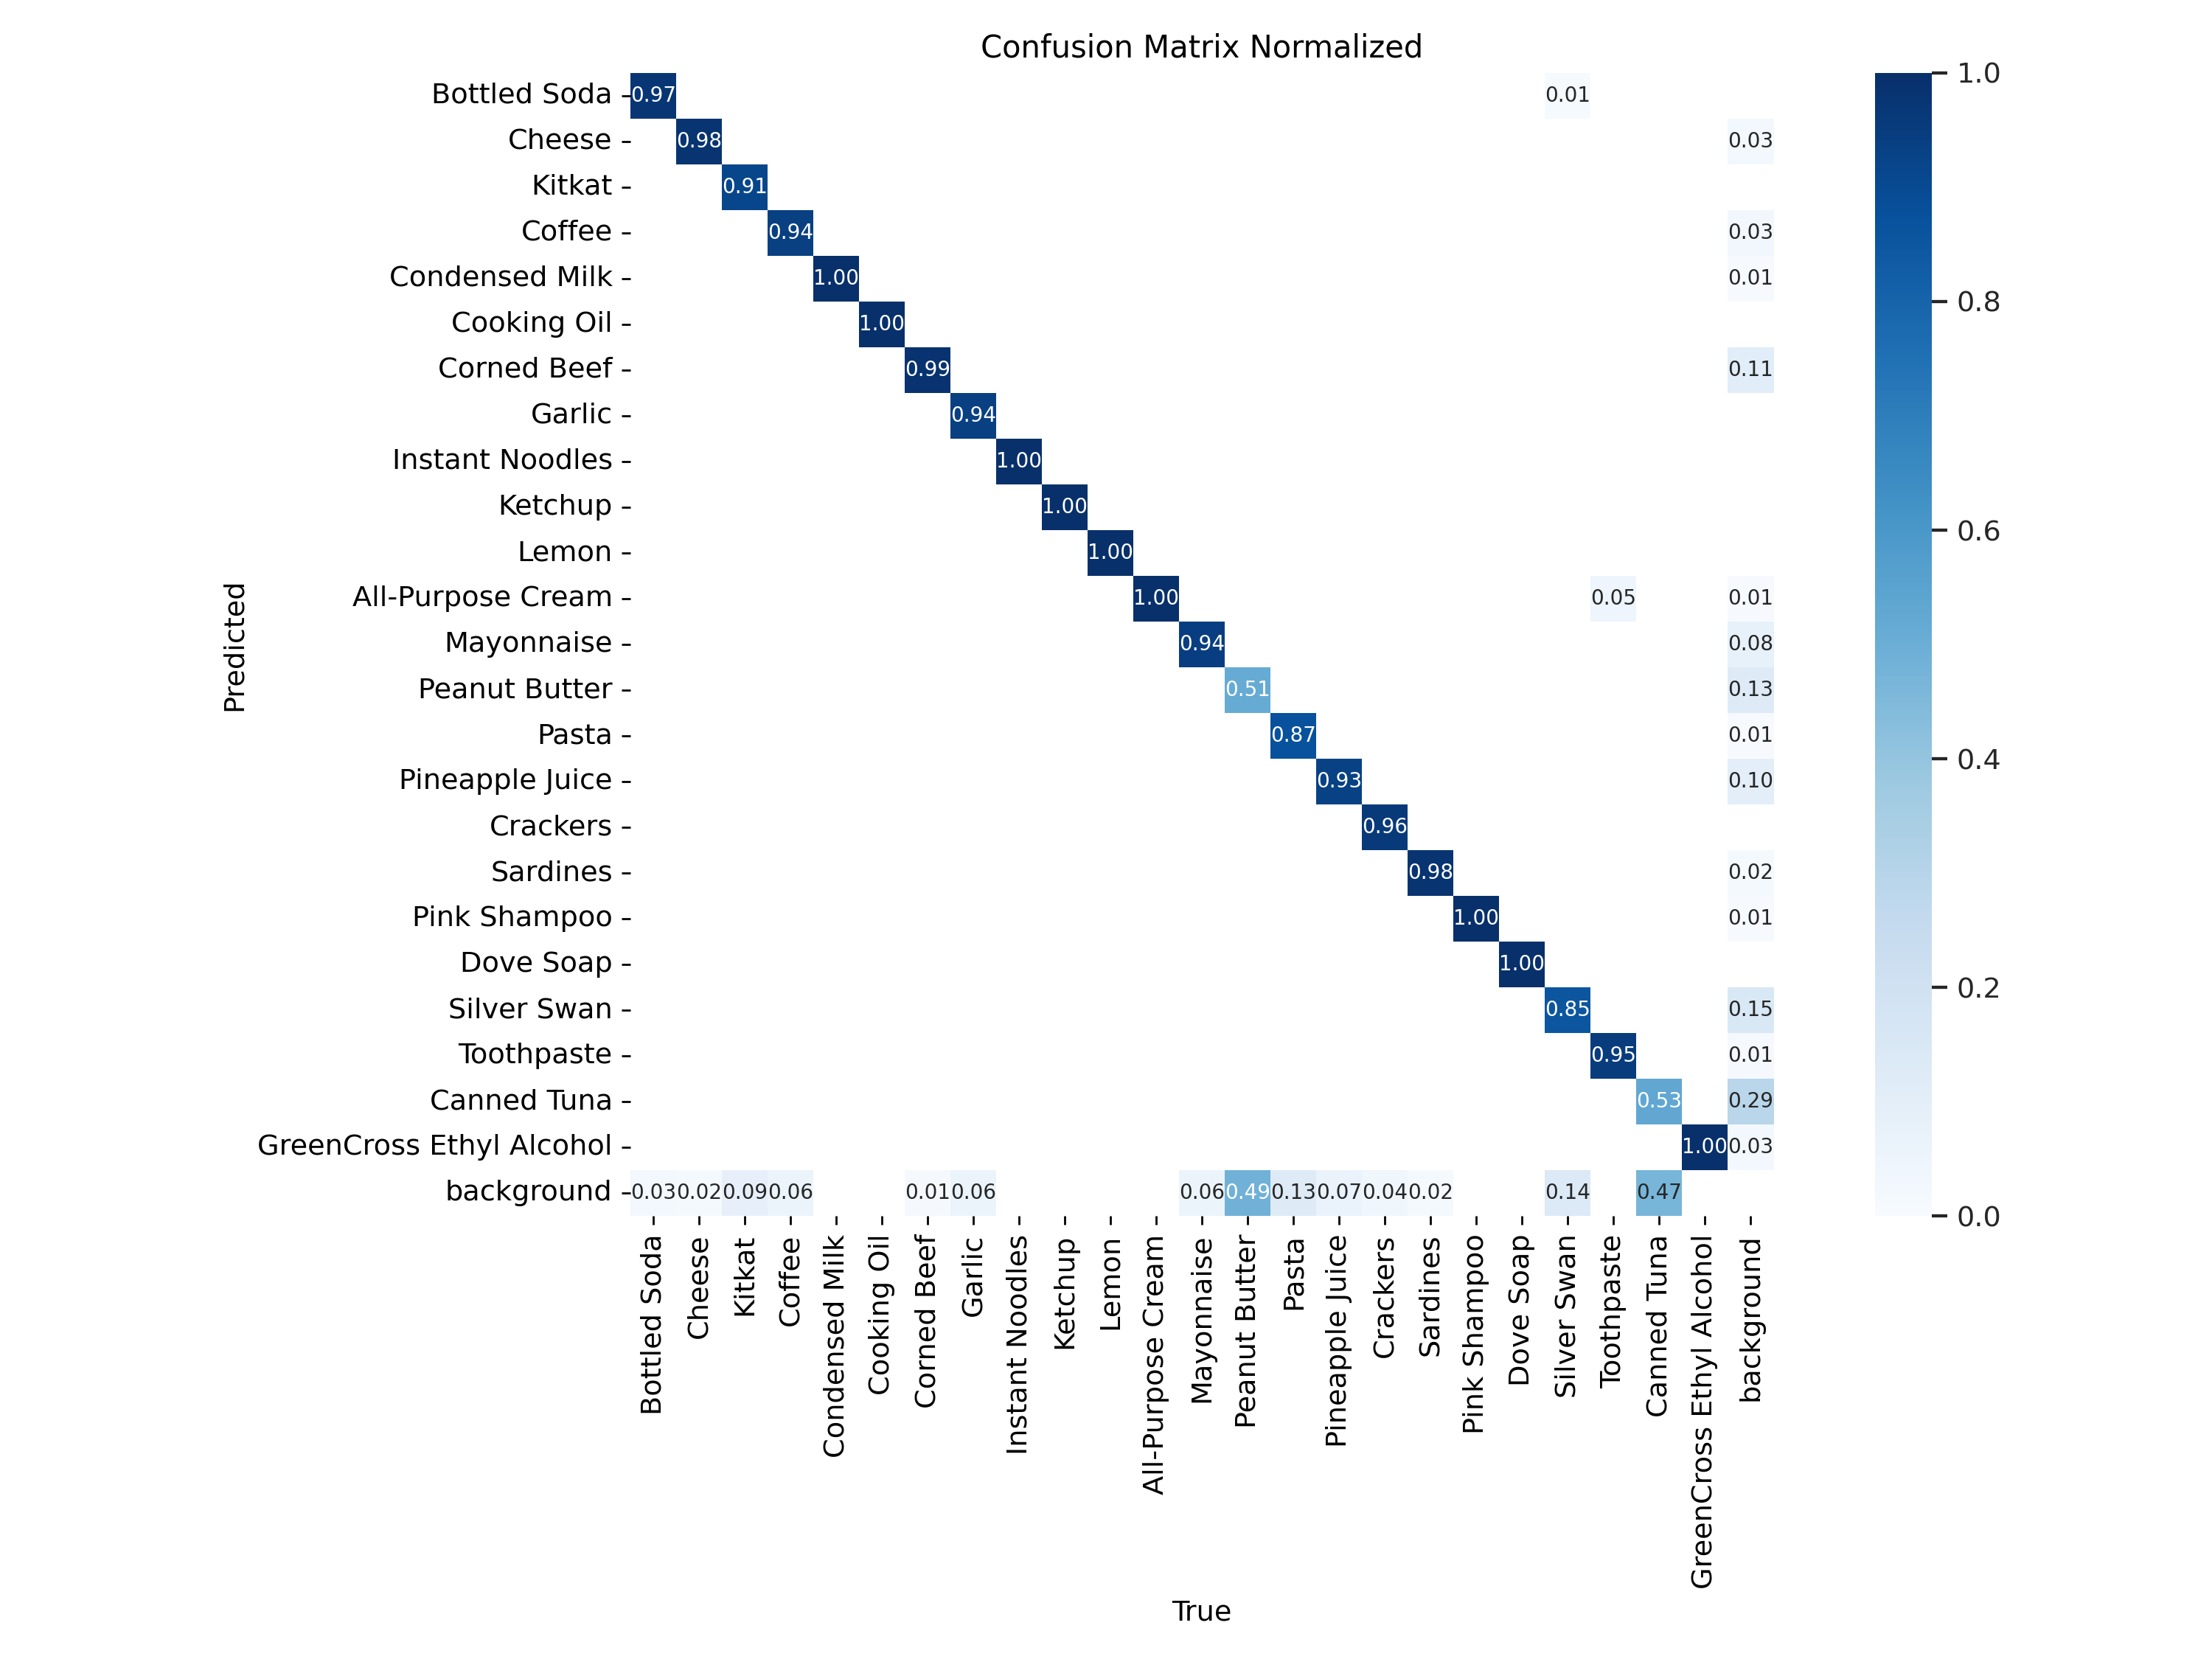

In [8]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val6/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

## Inference test on Trial 6

In [5]:
!yolo task=segment mode=predict model=runs/segment/train6/weights/best.pt source=dataset/images/val

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11x-seg summary (fused): 491 layers, 62,029,848 parameters, 0 gradients, 318.7 GFLOPs

image 1/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010012.jpg: 640x480 1 Bottled Soda, 52.4ms
image 2/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010017.jpg: 640x480 1 Bottled Soda, 15.9ms
image 3/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010033.jpg: 640x480 1 Bottled Soda, 15.1ms
image 4/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010036.jpg: 640x480 1 Bottled Soda, 15.0ms
image 5/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010039.jpg: 640x480 1 Bottled Soda, 1 Sardines, 15.0ms
image 6/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010065.jpg: 640x480 1 Bottled Soda, 15.7ms
image 7/845 /rai

# Trial 7: Cosine LR scheduler on YOLO v11 X

In [6]:
!yolo task=segment mode=train model=yolo11x-seg.pt data=config.yaml epochs=10 imgsz=640 mosaic=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=0.373 translate=0.45 scale=0.5 shear=0.3 flipud=0.01 fliplr=0.5 batch=256 lr0=0.01 lrf=0.001 cos_lr=true device=0,1,2,3,4,5,6,7

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:1 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:3 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:4 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:5 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:6 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:7 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolo11x-seg.pt, data=config.yaml, epochs=10, time=None, patience=100, batch=256, img

In [9]:
!yolo task=segment mode=val model=runs/segment/train7/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11x-seg summary (fused): 491 layers, 62,029,848 parameters, 0 gradients, 318.7 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        845       1862      0.951      0.918      0.938      0.864      0.943      0.912      0.921      0.819
          Bottled Soda         37         37      0.973      0.966      0.992      0.917      0.973      0.966      0.992      0.897
                Cheese         40         58      0.975      0.948      0.989      0.894      0.975      0.948      0.989      0.874
                Kitkat         42         47          1      0.925      0.969      0.903          1      0.925      0.967      0.876
                Coffee         30         66      0.933      0.939      0.958      0.874      0.948      0.955      0.957

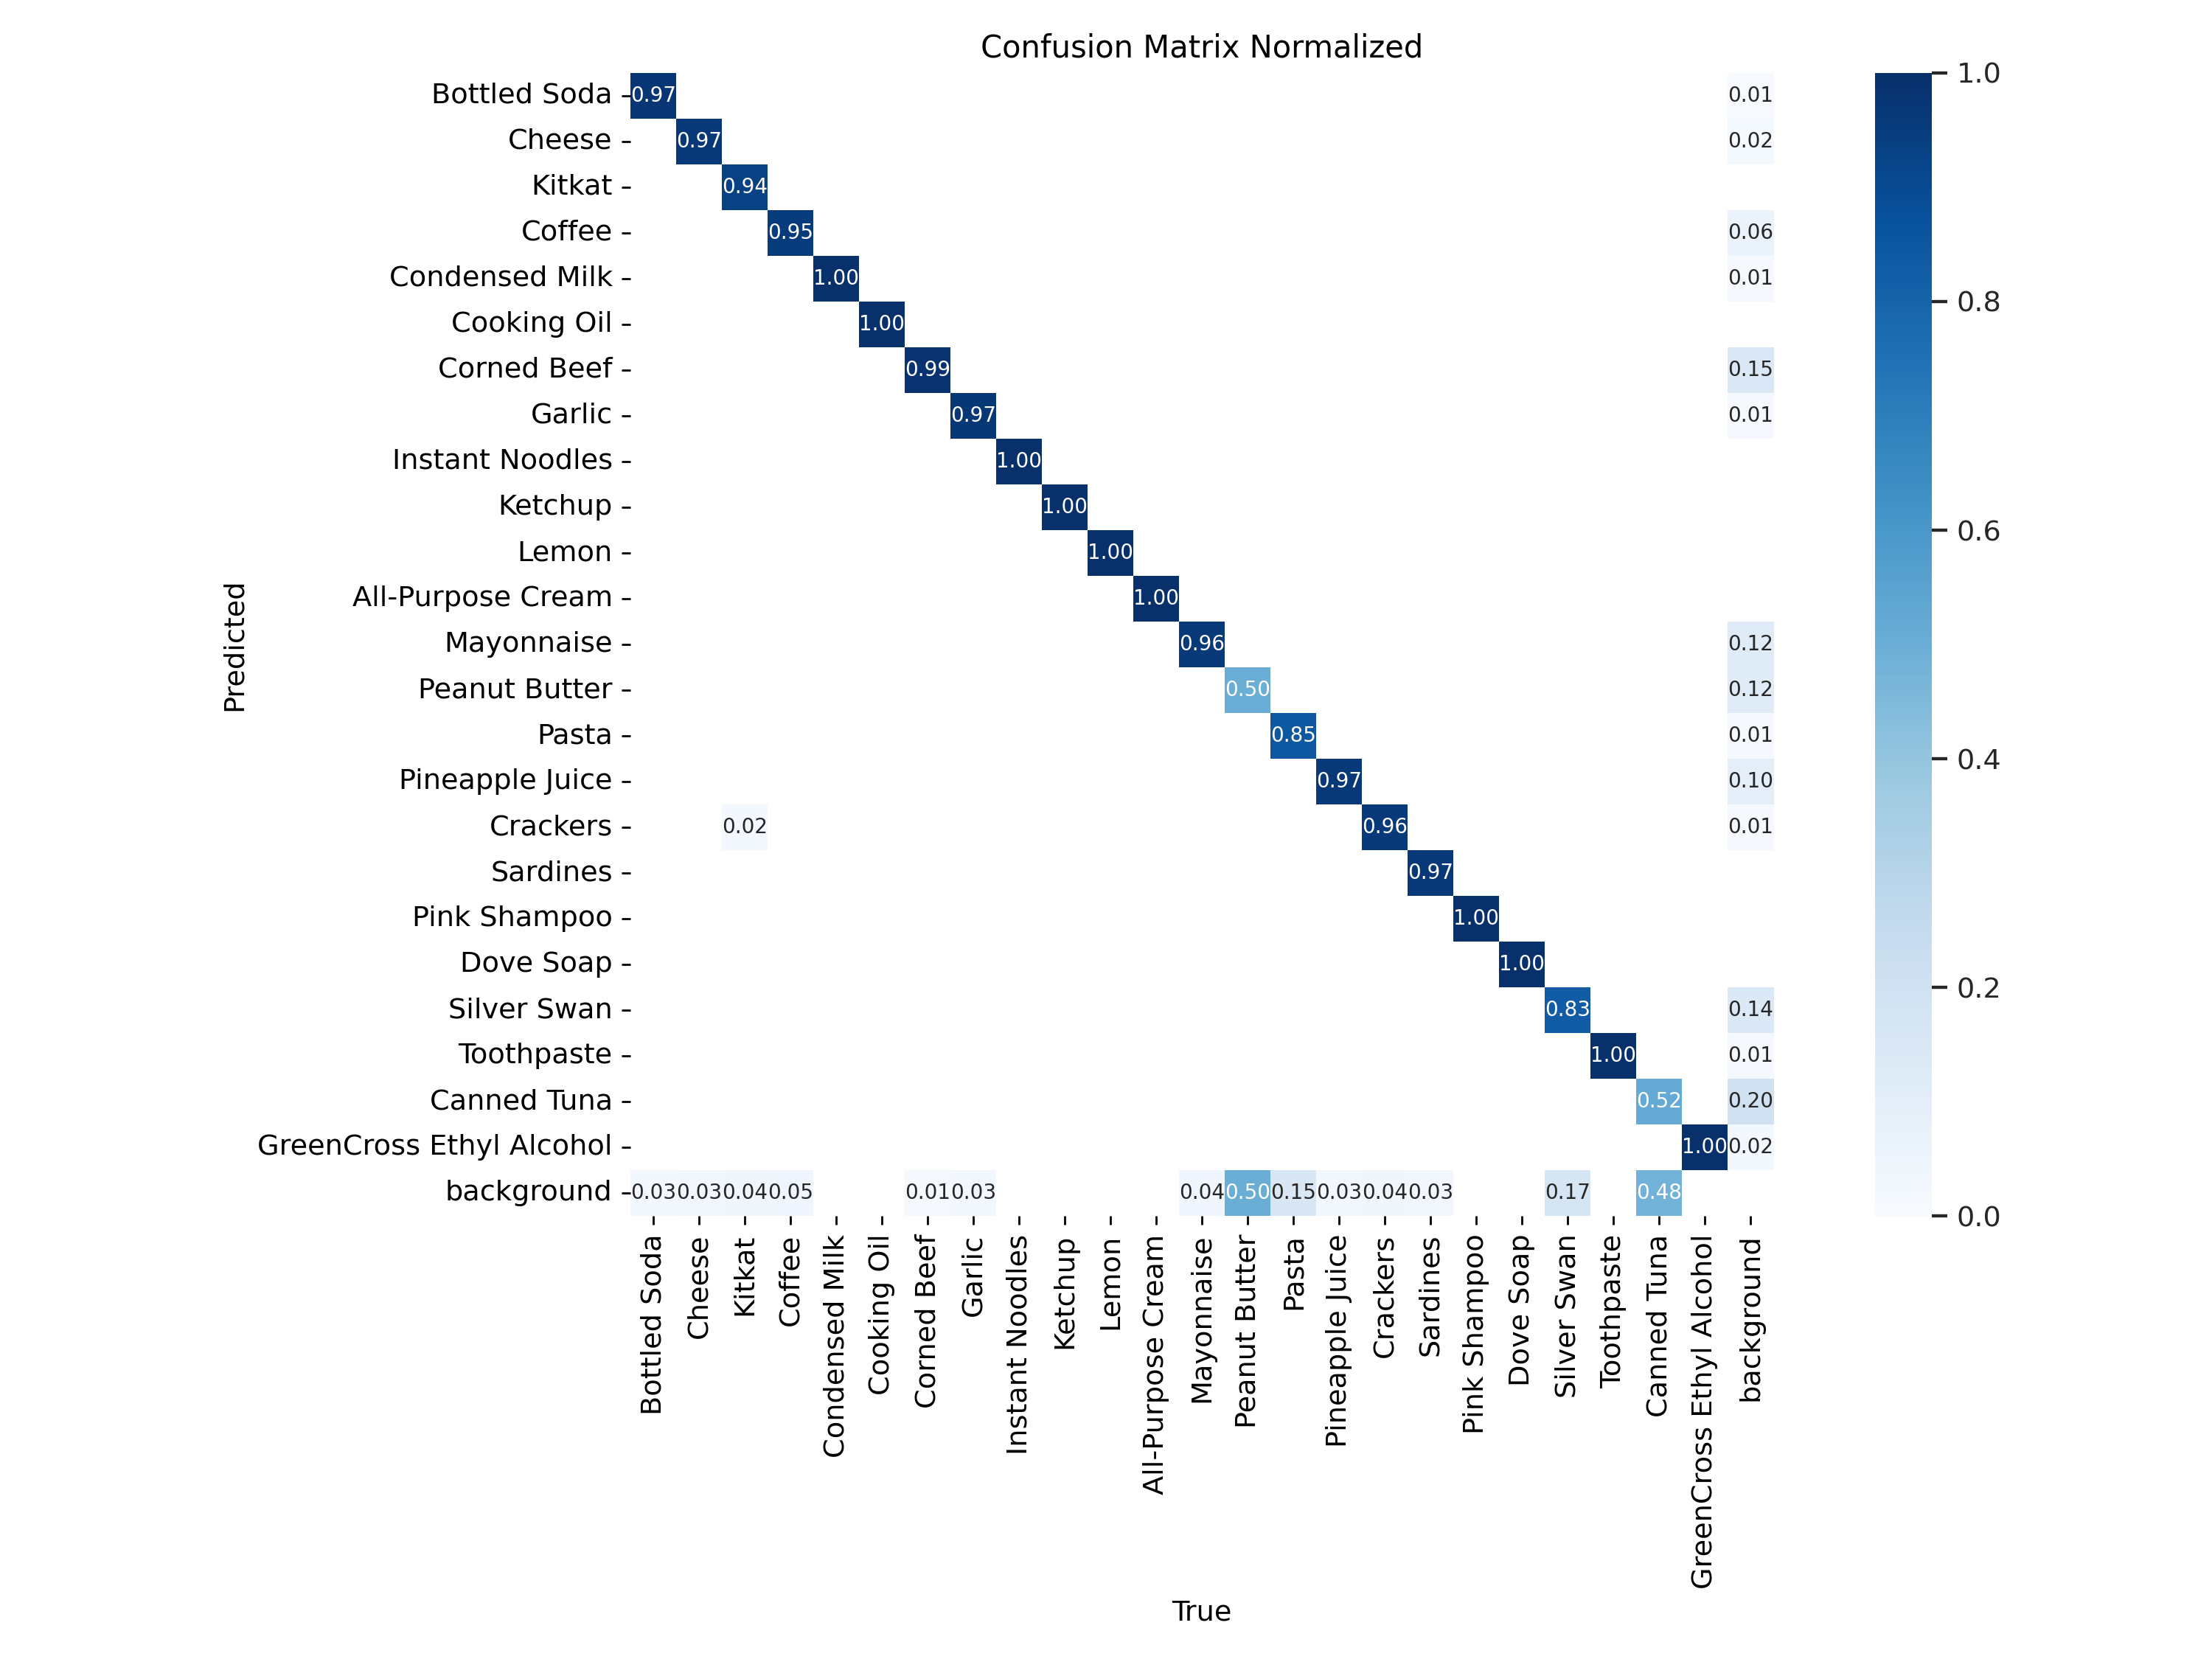

In [10]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val7/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

## Inference test on Trial 7

In [11]:
!yolo task=segment mode=predict model=runs/segment/train7/weights/best.pt source=dataset/images/val

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11x-seg summary (fused): 491 layers, 62,029,848 parameters, 0 gradients, 318.7 GFLOPs

image 1/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010012.jpg: 640x480 1 Bottled Soda, 52.4ms
image 2/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010017.jpg: 640x480 1 Bottled Soda, 15.3ms
image 3/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010033.jpg: 640x480 1 Bottled Soda, 14.6ms
image 4/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010036.jpg: 640x480 1 Bottled Soda, 14.6ms
image 5/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010039.jpg: 640x480 1 Bottled Soda, 14.6ms
image 6/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010065.jpg: 640x480 1 Bottled Soda, 15.1ms
image 7/845 /raid/students/j

# Trial 8: More epochs (YOLO v11 X)

Increase epochs to 20.

In [1]:
!yolo task=segment mode=train model=yolo11x-seg.pt data=config.yaml epochs=20 imgsz=640 mosaic=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=0.373 translate=0.45 scale=0.5 shear=0.3 flipud=0.01 fliplr=0.5 batch=256 device=0,1,2,3,4,5,6,7

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:1 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:3 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:4 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:5 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:6 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:7 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolo11x-seg.pt, data=config.yaml, epochs=20, time=None, patience=100, batch=256, img

In [2]:
!yolo task=segment mode=val model=runs/segment/train8/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11x-seg summary (fused): 491 layers, 62,029,848 parameters, 0 gradients, 318.7 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        845       1862      0.964      0.933      0.948      0.891      0.958      0.926      0.935      0.853
          Bottled Soda         37         37      0.987          1      0.995      0.949      0.987          1      0.995      0.922
                Cheese         40         58      0.982      0.944      0.992      0.935      0.982      0.941      0.992       0.92
                Kitkat         42         47          1      0.967      0.994      0.931      0.978      0.946      0.973      0.916
                Coffee         30         66      0.968      0.928      0.965      0.895      0.968      0.927      0.959

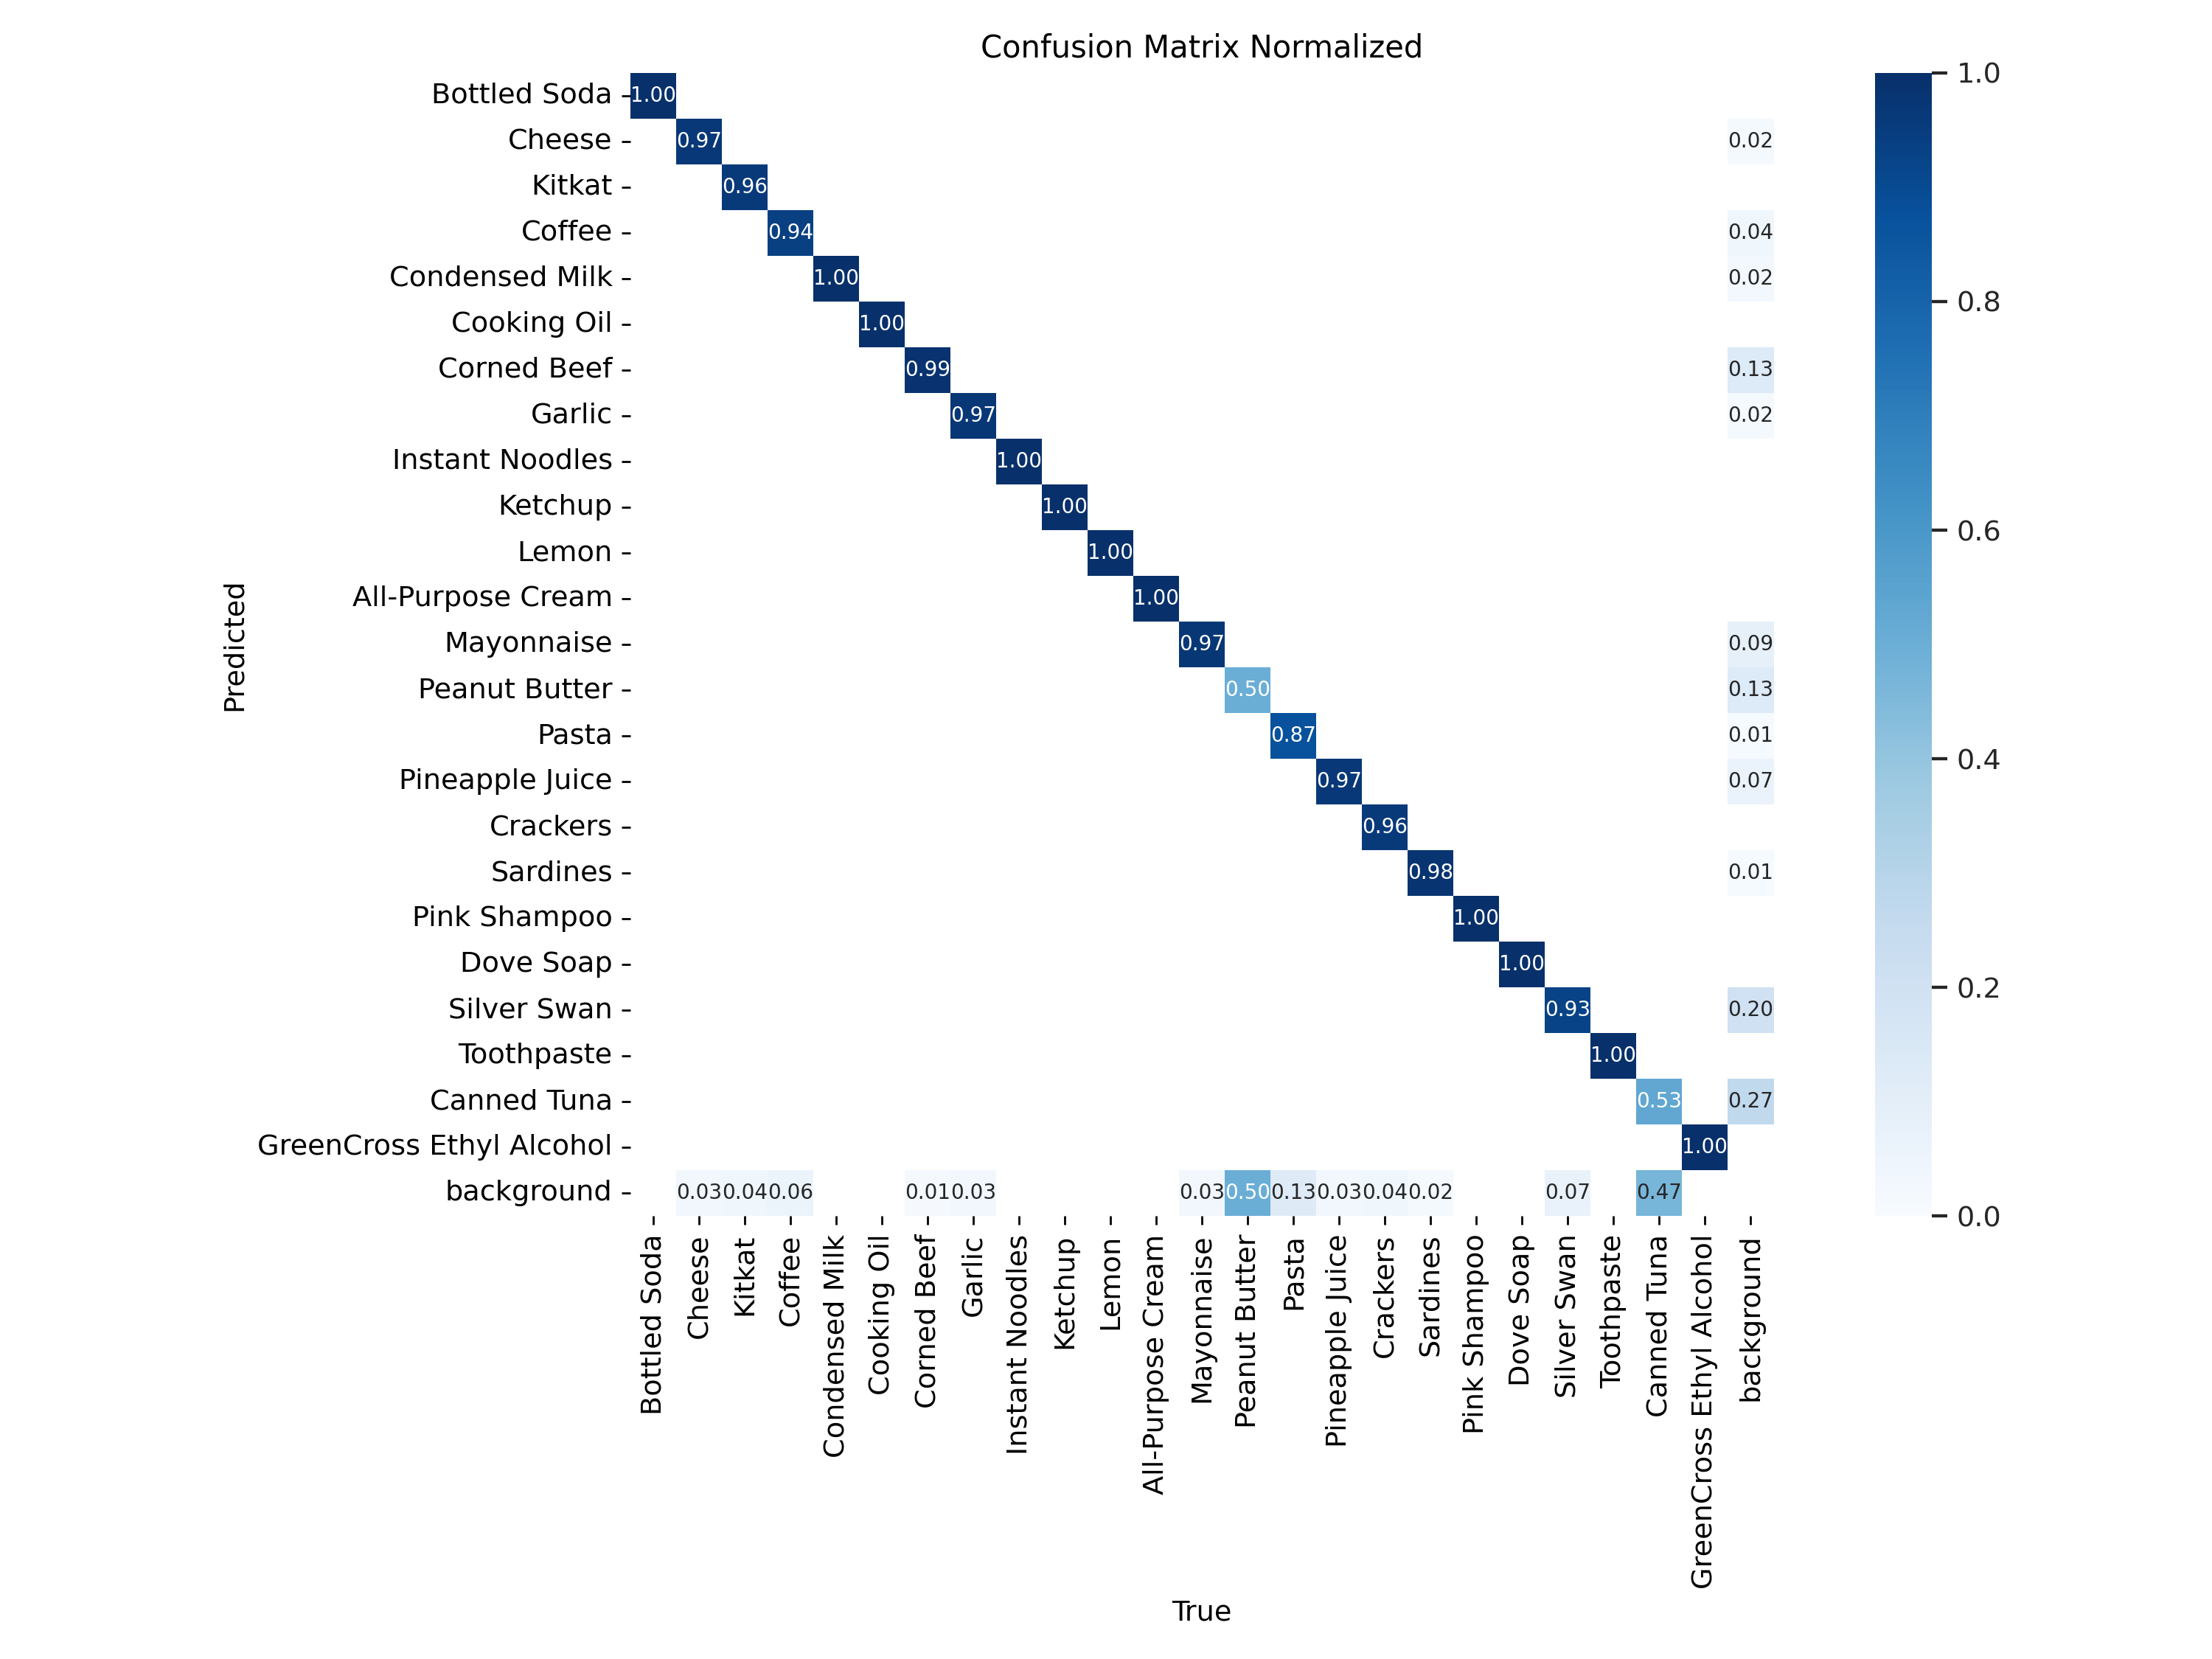

In [3]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val8/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

## Inference test on Trial 8

In [4]:
!yolo task=segment mode=predict model=runs/segment/train8/weights/best.pt source=dataset/images/val

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11x-seg summary (fused): 491 layers, 62,029,848 parameters, 0 gradients, 318.7 GFLOPs

image 1/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010012.jpg: 640x480 1 Bottled Soda, 51.9ms
image 2/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010017.jpg: 640x480 1 Bottled Soda, 15.2ms
image 3/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010033.jpg: 640x480 1 Bottled Soda, 14.9ms
image 4/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010036.jpg: 640x480 1 Bottled Soda, 14.7ms
image 5/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010039.jpg: 640x480 1 Bottled Soda, 14.6ms
image 6/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010065.jpg: 640x480 1 Bottled Soda, 15.0ms
image 7/845 /raid/students/j

# Trial 9: Increased epochs to 30

In [8]:
!yolo task=segment mode=train model=yolo11x-seg.pt data=config.yaml epochs=30 imgsz=640 mosaic=0.5 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=0.373 translate=0.45 scale=0.5 shear=0.3 flipud=0.01 fliplr=0.5 batch=112 device=0,1,2,3,5,6,7

New https://pypi.org/project/ultralytics/8.3.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:1 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:2 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:3 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:5 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:6 (NVIDIA A100-SXM4-40GB, 40339MiB)
                                                       CUDA:7 (NVIDIA A100-SXM4-40GB, 40339MiB)
engine/trainer: task=segment, mode=train, model=yolo11x-seg.pt, data=config.yaml, epochs=30, time=None, patience=100, batch=112, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1, 2, 3, 5, 6, 7), workers=8, project

In [9]:
!yolo task=segment mode=val model=runs/segment/train9/weights/best.pt data=config.yaml epochs=1 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11x-seg summary (fused): 491 layers, 62,029,848 parameters, 0 gradients, 318.7 GFLOPs
val: Scanning /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/l
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        845       1649      0.964      0.958      0.974      0.919      0.959      0.952      0.963      0.884
          Bottled Soda         37         37      0.991          1      0.995      0.955      0.991          1      0.995      0.918
                Cheese         40         58      0.979      0.948      0.984      0.942       0.98      0.948      0.984       0.91
                Kitkat         42         47          1      0.953      0.993      0.949      0.978      0.931      0.974      0.915
                Coffee         30         66      0.962      0.894      0.953      0.884      0.979      0.909      0.948

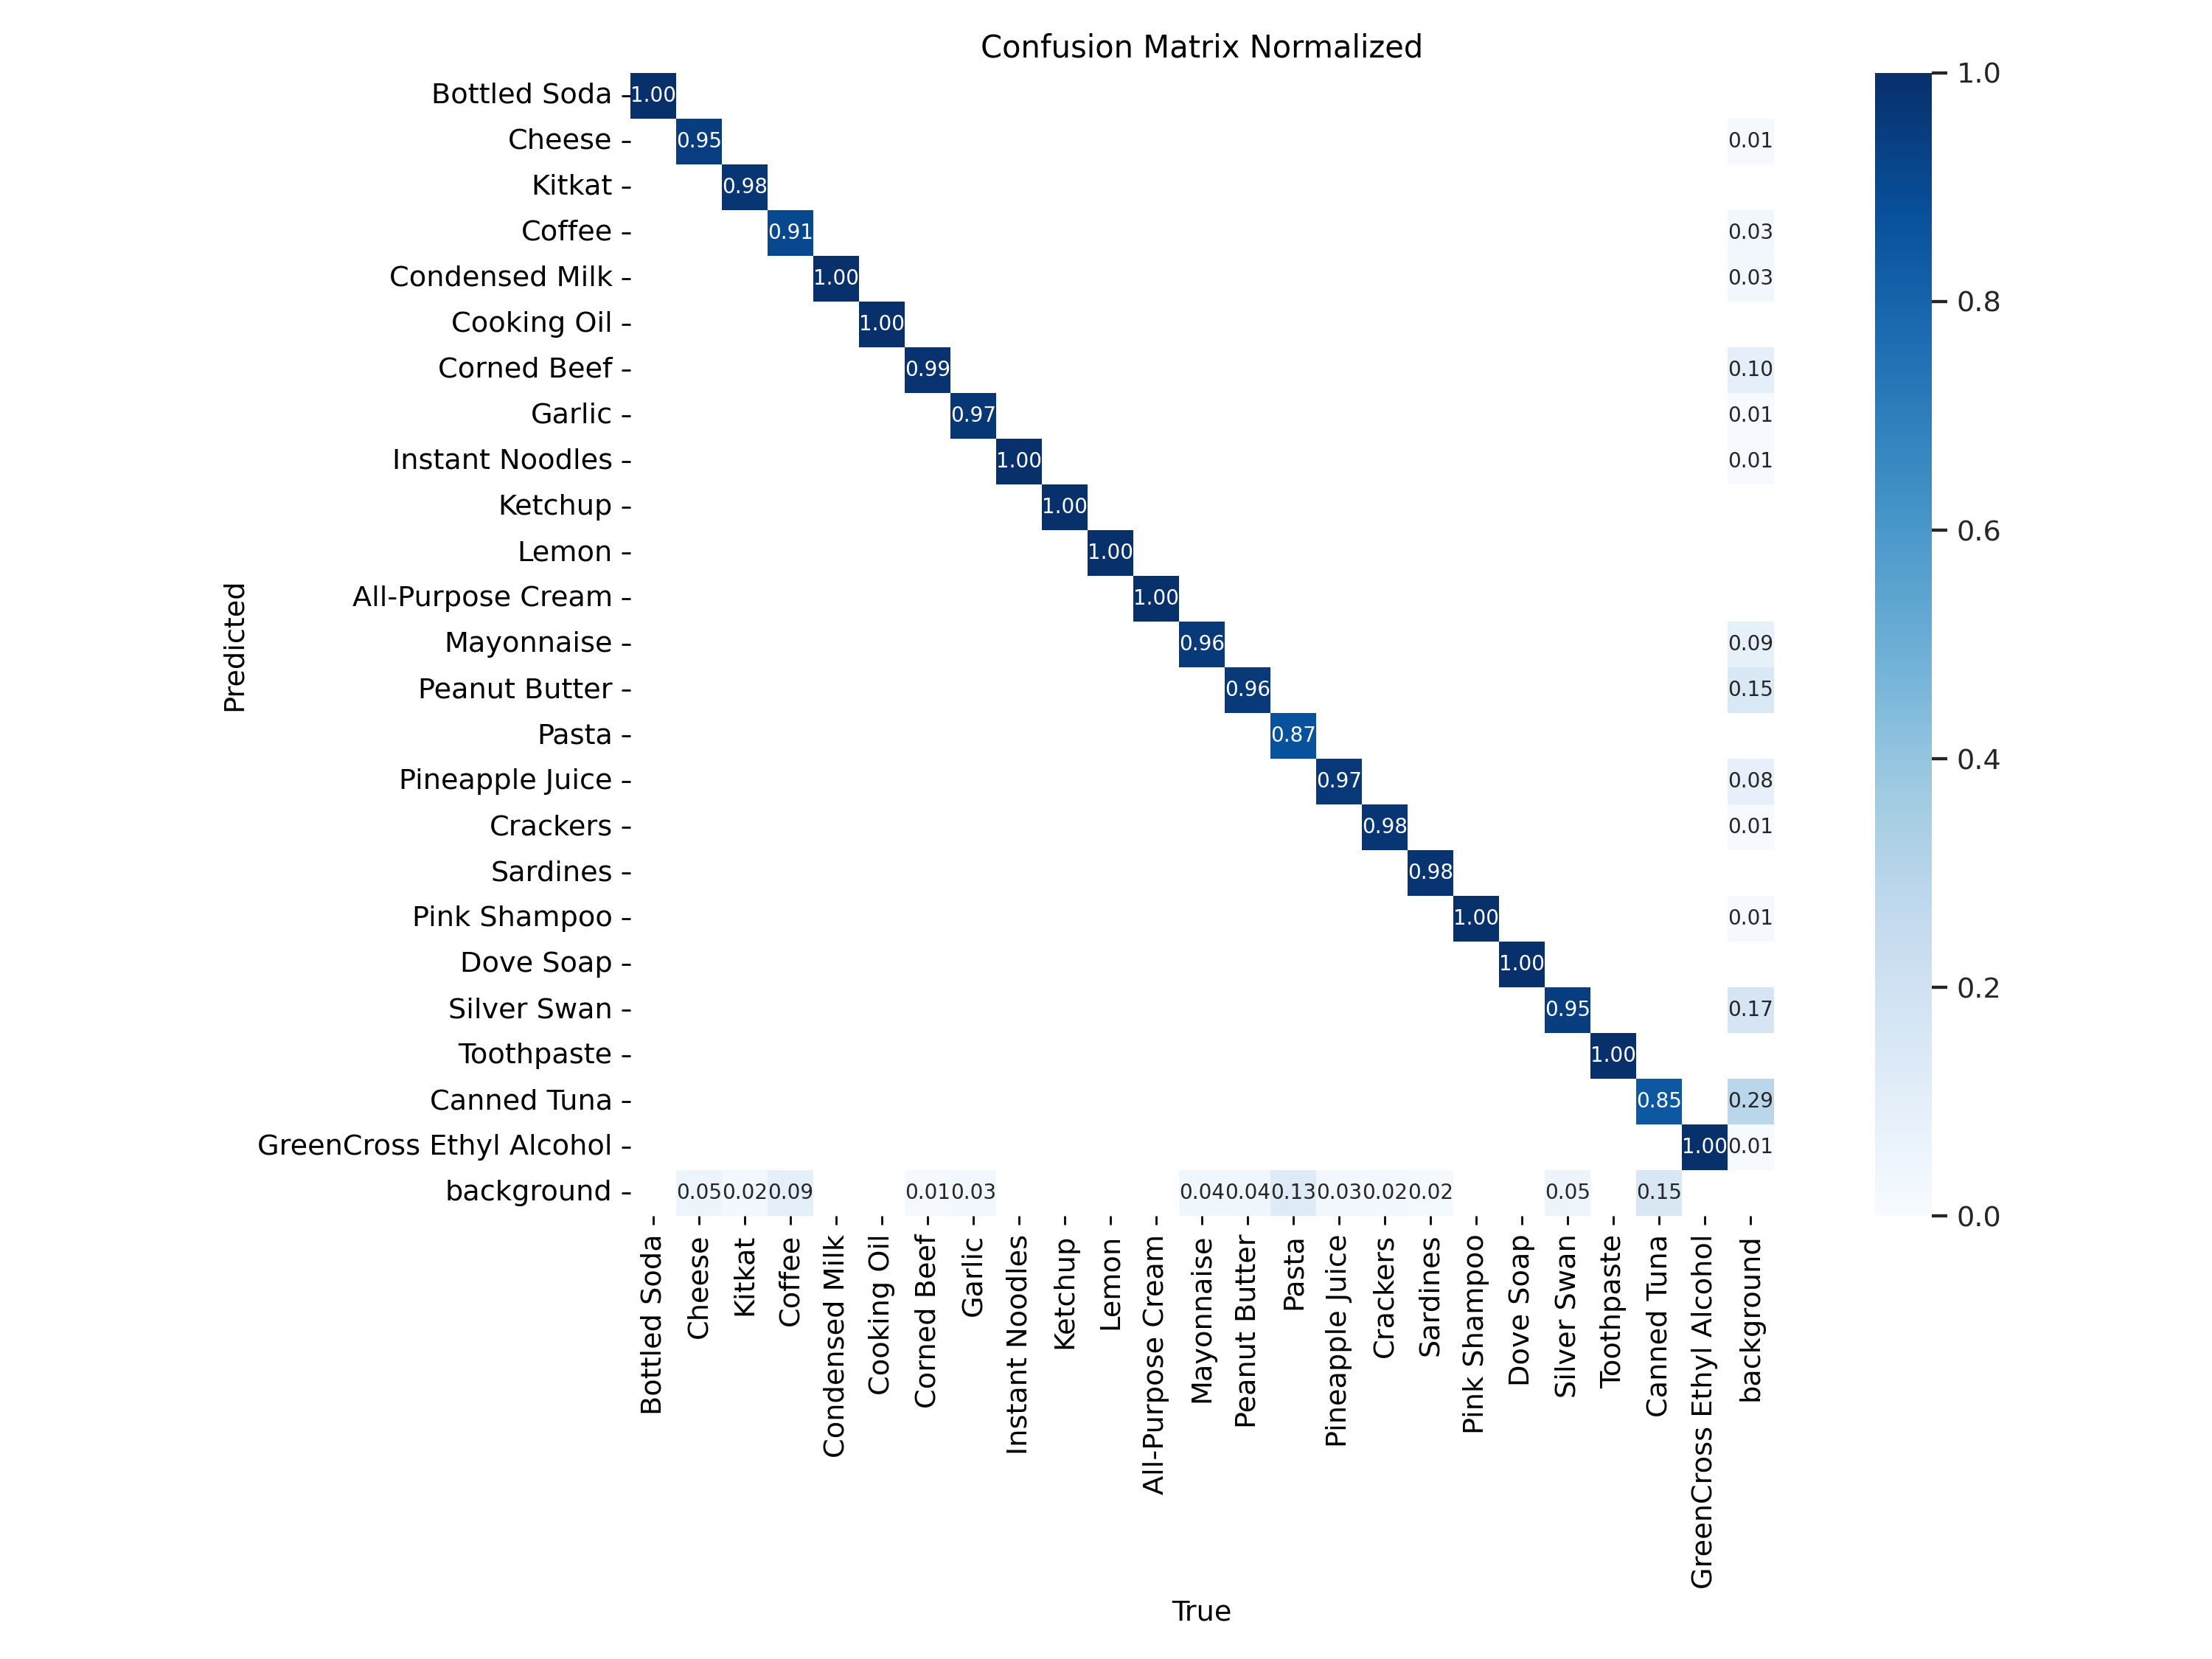

In [10]:
from PIL import Image
from IPython.display import display

image_path = 'runs/segment/val9/confusion_matrix_normalized.png'

# Open and display the image
image = Image.open(image_path)
display(image)

## Inference test on Trial 9

In [11]:
!yolo task=segment mode=predict model=runs/segment/train9/weights/best.pt source=dataset/images/val

Ultralytics 8.3.29 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40339MiB)
YOLO11x-seg summary (fused): 491 layers, 62,029,848 parameters, 0 gradients, 318.7 GFLOPs

image 1/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010012.jpg: 640x480 1 Bottled Soda, 54.2ms
image 2/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010017.jpg: 640x480 1 Bottled Soda, 17.0ms
image 3/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010033.jpg: 640x480 1 Bottled Soda, 33.4ms
image 4/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010036.jpg: 640x480 1 Bottled Soda, 17.3ms
image 5/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010039.jpg: 640x480 1 Bottled Soda, 16.8ms
image 6/845 /raid/students/juan/train/grocery-item-segmentation-yolo/dataset/images/val/010065.jpg: 640x480 1 Bottled Soda, 37.6ms
image 7/845 /raid/students/j